For educational purposes, I am applying the methodology described in the research paper "Drug Recommendation System for Diabetes Using a Collaborative Filtering and Clustering Approach: Development and Performance Evaluation," authored by Luis Fernando Granda Morales, Priscila Valdiviezo-Diaz, Ruth Reátegui, and Luis Barba-Guaman. You can access the paper here. Link: https://www.jmir.org/2022/7/e37233

The study leverages advanced data analysis techniques through the following machine learning approaches:

    - Principal Component Analysis (PCA) with Random Forest and Gradient Boosting Machine (GBM)
    - H2O AutoML (Automatic Machine Learning)
    - Random Forest with ShapRFECV implementation in Python

The goal is to analyze the impact of feature elimination, explore the utility of ShapRFECV, and determine the most effective models for the diabetes dataset.

## Data Description

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


The data to practice is on UCI: https://archive.ics.uci.edu/dataset/296/diabetes+130-

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## The Data

The original data set includes more than 50 features representing patient outcomes from 130 US hospitals. This data set has more than 100,000 patient records, which refer to 10 years of health care records (from 1999 to 2008).


In [2]:
df = pd.read_csv('data/diabetic_data.csv')
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
print("The data set contains {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The data set contains 101766 rows and 50 columns.


# Data Preparation

In [5]:
df_diabetes =df.copy()

#### Age feature

In [6]:
age_mapping = {
    '[70-80)': 75,
    '[60-70)': 65,
    '[50-60)': 55,
    '[80-90)': 85,
    '[40-50)': 45,
    '[30-40)': 35,
    '[90-100)': 95,
    '[20-30)': 25,
    '[10-20)': 15,
    '[0-10)': 5
}

In [7]:
df_diabetes['age_mean'] = df_diabetes['age'].map(age_mapping)

In [8]:
df_diabetes.drop('age', axis =1, inplace = True )

#### Dealing with Duplicate Records

For some patient there are number of entries in the dataset these duplicate entries are not helpful in solving the task hence we removed these entries.

In [9]:
print('Unique entries = ', len(np.unique(df_diabetes['patient_nbr'])))
df_diabetes.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df_diabetes))

Unique entries =  71518
Length after removing Duplicates: 71518


Eliminating records of patients who had not been prescribed any medication


In [10]:
df_diabetes = df_diabetes[df_diabetes['num_medications'] > 0]
df_diabetes.shape

(71518, 50)

## Missing Data


In [11]:
df_diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               68062
A1Cresult                   58532
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

<Axes: >

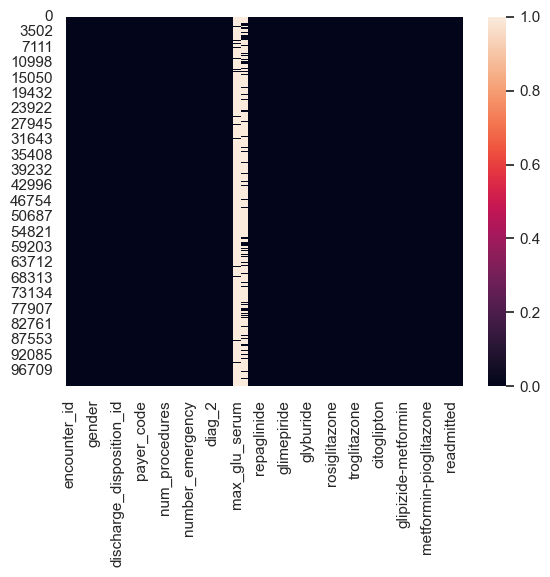

In [12]:
sns.heatmap(df_diabetes.isnull())

In [13]:
# Missing values
df_diabetes.columns[df_diabetes.isnull().any()]

Index(['max_glu_serum', 'A1Cresult'], dtype='object')

In [14]:
# Range of the result of the serum glucose level or if the test was not performed
df_diabetes['max_glu_serum'].fillna('No', inplace = True)


In [15]:
# Range of the result of the hemoglobin A1C level or if the test was not performed

df_diabetes['A1Cresult'].fillna('No', inplace = True)

<Axes: >

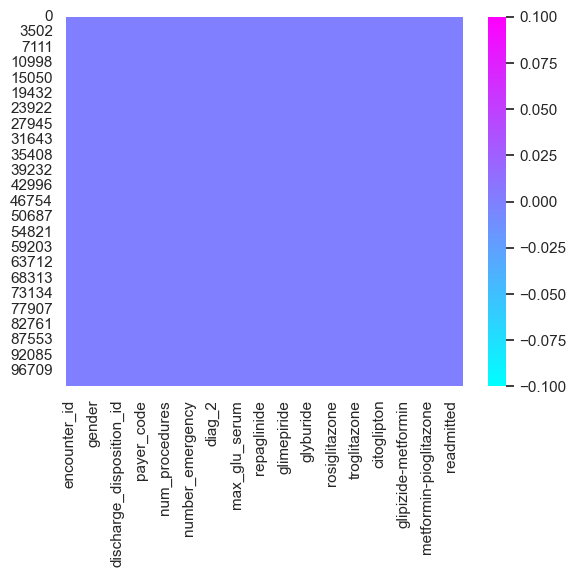

In [16]:
# Check Null values again

sns.heatmap(df_diabetes.isnull(),cmap='cool')

columns "race", "gender", "weight" need to be cleaned.

In [17]:
# Check missing value rate of 'weight'

# The "?" represents missing values

df_diabetes['weight'].value_counts() /len(df_diabetes['weight'])

weight
?            0.960108
[75-100)     0.016709
[50-75)      0.010920
[100-125)    0.007914
[125-150)    0.001832
[25-50)      0.001244
[0-25)       0.000643
[150-175)    0.000461
[175-200)    0.000126
>200         0.000042
Name: count, dtype: float64

Because the missing value rate of "weight" is more than 96%. It means that the majority of the values are missing, so we will exlude them in the model.

In [18]:
df_diabetes.drop('weight', axis =1, inplace = True )

#### Race feature

In [19]:
df_diabetes['race'].replace("?", "Other", inplace = True)

#### Gender feature

In [20]:
df_diabetes['gender'].replace("Unknown/Invalid",df['gender'].mode()[0], inplace = True)

## Dealing with 'No' values in the columns

In [21]:
def count_no_percent(col):
        return (df_diabetes[col].eq("No").sum()) / len(df_diabetes) * 100

In [22]:
columns_no_value_drop = []

In [23]:
for col in df_diabetes.columns:
    no_percent = count_no_percent(col)
    if no_percent > 99.5:
        columns_no_value_drop.append(col)
        print(f"Column '{col}' contains {no_percent:.2f}% 'No' values")

Column 'chlorpropamide' contains 99.90% 'No' values
Column 'acetohexamide' contains 100.00% 'No' values
Column 'tolbutamide' contains 99.97% 'No' values
Column 'acarbose' contains 99.72% 'No' values
Column 'miglitol' contains 99.97% 'No' values
Column 'troglitazone' contains 100.00% 'No' values
Column 'tolazamide' contains 99.96% 'No' values
Column 'examide' contains 100.00% 'No' values
Column 'citoglipton' contains 100.00% 'No' values
Column 'glipizide-metformin' contains 99.99% 'No' values
Column 'glimepiride-pioglitazone' contains 100.00% 'No' values
Column 'metformin-rosiglitazone' contains 100.00% 'No' values
Column 'metformin-pioglitazone' contains 100.00% 'No' values


Noninformative features in the data set were discarded because the feature is unbalanced (99.5% of the data had the same value for a feature). 

In [24]:
df_diabetes.drop(columns_no_value_drop, axis = 1, inplace = True)

In [25]:
df_diabetes.shape

(71518, 36)

## Data Transformation

The data transformation process generally involves converting variables to another type of data and creating new variables. In our case, we converted categorical variables to binary variables, such as gender, maximum glucose serum level, and hemoglobin A1C test result.



In [26]:
# Transfrom "maximum glucose serum level" to binary

# "1" means the test was performed and "0" means the test was not performed

df_diabetes['max_glu_serum']= df_diabetes['max_glu_serum'].replace({'Norm':1,'>200': 1, '>300': 1, 'No':0})


df_diabetes['max_glu_serum'].value_counts()

max_glu_serum
0    68062
1     3456
Name: count, dtype: int64

In [27]:
# Transfrom "maximum glucose serum level" to binary

# "Yes" means the test was performed and "No" means the test was not performed

df_diabetes['A1Cresult']= df_diabetes['A1Cresult'].replace({'Norm':1,'>8': 1, '>7': 1, 'No':0})


df_diabetes['A1Cresult'].value_counts()

A1Cresult
0    58532
1    12986
Name: count, dtype: int64

In [28]:
# Transfrom "gender" to binary

df_diabetes['gender']= df_diabetes['gender'].replace({'Male':1, 'Female':0})


df_diabetes['gender'].value_counts()

gender
0    38028
1    33490
Name: count, dtype: int64

In [29]:
# Transfrom "gender" to binary

df_diabetes['race']= df_diabetes['race'].replace({'Caucasian':1,'AfricanAmerican':0, 'Other':0, 'Hispanic':0 , 'Asian':0})


df_diabetes['race'].value_counts()

race
1    53491
0    18027
Name: count, dtype: int64

In [30]:
# Transfrom "diabetesMed" to binary

df_diabetes['diabetesMed']= df_diabetes['diabetesMed'].replace({'Yes':1, "No":0})


In [31]:
df_diabetes['change']= df_diabetes['change'].replace({'Ch':1, 'No':0})


In [32]:
# Transfrom "readmitted" to binary

df_diabetes['readmitted']= df_diabetes['readmitted'].replace({'>30':1, '<30':1, "NO":0})

In [33]:
df_diabetes['readmitted'].value_counts()

readmitted
0    42985
1    28533
Name: count, dtype: int64

In [34]:
# Define the mapping
mapping = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}

# List of columns to be transformed
columns_to_transform = [
    'metformin', 'repaglinide', 'nateglinide', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide-metformin', 'glimepiride'
]

# Apply the mapping to each specified column
for col in columns_to_transform:
    df_diabetes[col] = df_diabetes[col].map(mapping)



# Deal with outliers

time_in_hospital	Number of days between admission and discharge	1-14

num_lab_procedures	Number of laboratory tests performed during the encounter	1-132

num_procedures	Number of procedures performed during the encounter	0-6

num_medications	Number of different drugs (generic names) administered during the encounter	1-81

number_outpatient	Number of outpatient visits	0-42

number_emergency	Number of emergency visits	0-76

number_inpatient	Number of inpatient visits	0-21

number_diagnoses	Number of diagnoses

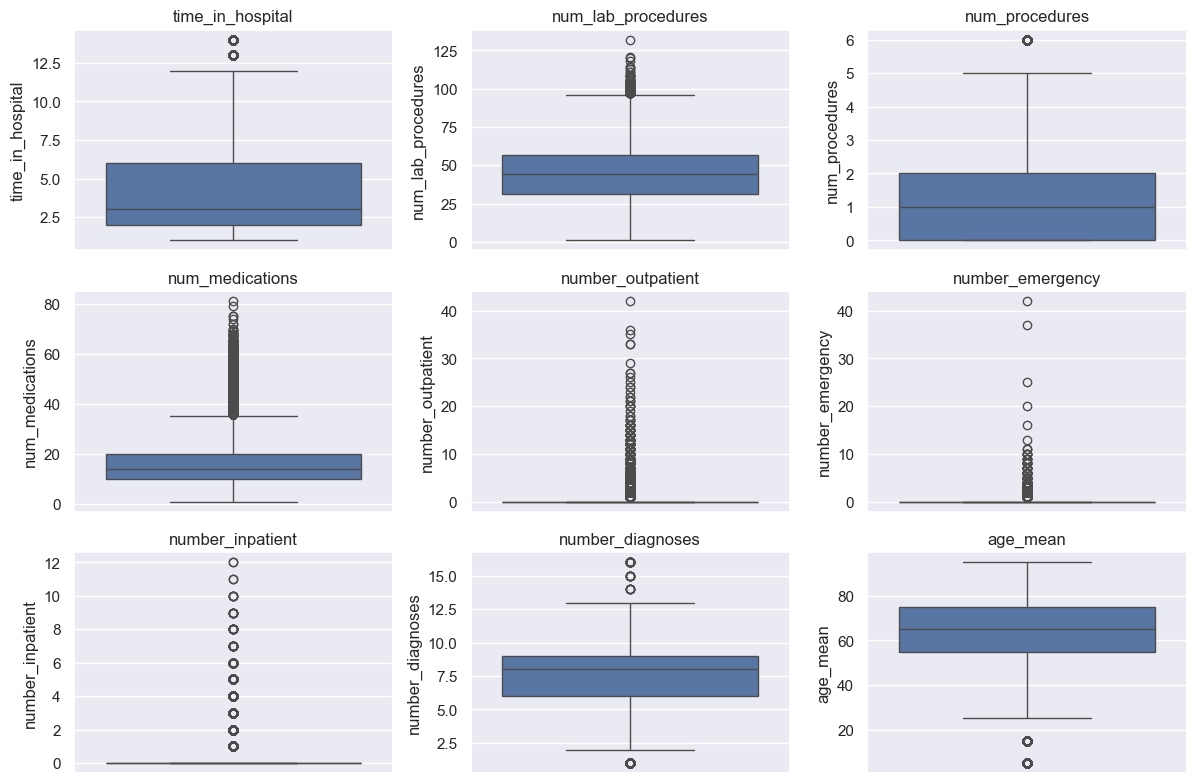

In [35]:

# Numerical columns
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
            'num_medications', 'number_outpatient', 'number_emergency', 
            'number_inpatient', 'number_diagnoses', 'age_mean']

# Box plots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_diabetes[col])
    plt.title(col)
plt.tight_layout()
plt.show()


The box plots clearly highlight the presence of outliers in several numerical variables. These outliers are represented by individual points that lie beyond the whiskers of the box plot.

Here's a breakdown of the variables with notable outliers:

time_in_hospital: A few patients have exceptionally long hospital stays, extending beyond 10 days.

num_lab_procedures: Some patients underwent a significantly higher number of lab procedures compared to the majority.

num_medications: There are individuals who received a substantially larger number of medications.

number_outpatient: A small proportion of patients have an unusually high number of outpatient visits.

number_emergency: A few patients have a strikingly high number of emergency room visits.

number_inpatient: A small number of patients had a large number of inpatient visits.

number_diagnoses: Some patients received a notably higher number of diagnoses.

age_mean: There are a few individuals who are considerably older than the general population in the dataset.

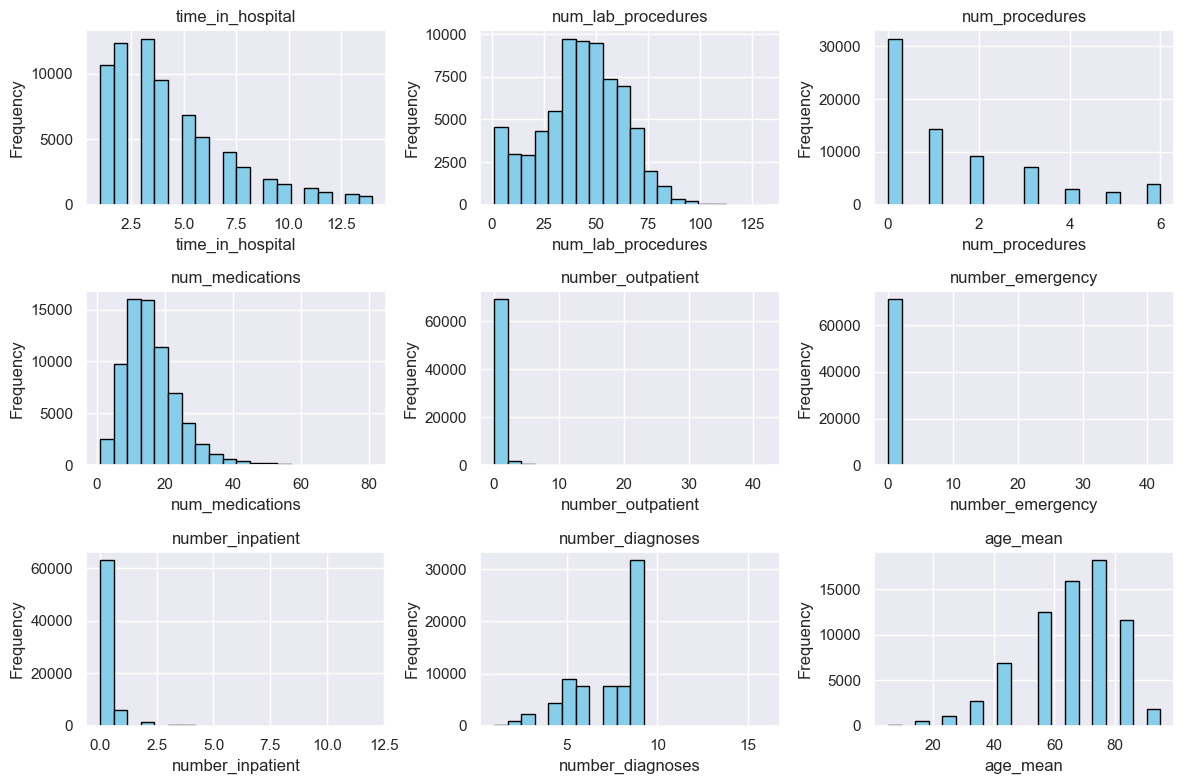

In [36]:

# Plot histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_diabetes[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


The box plots and histograms show that the majority of the numerical variables are skewed to the right, meaning that there are a few observations with very high values compared to the rest. 

For example, the box plot for time_in_hospital shows that the majority of patients are in the hospital for less than 5 days, but there are some patients who are in the hospital for 10 days or more. The same pattern can be observed for num_lab_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, and number_diagnoses.


The histograms also show that the distributions are skewed to the right. For example, the histogram for time_in_hospital shows that most patients are in the hospital for less than 5 days, but there are some patients who are in the hospital for much longer.

## Compute the Mahalanobis distance and detect outliers

In [37]:
df_diabetes = df_diabetes.reset_index(drop=True)

In [38]:
from scipy.stats import chi2

def mahalanobis_distance(data):
    """
    Calculate the Mahalanobis distance for each data point.
    
    Parameters:
    data (pandas.DataFrame): Input data with shape (n_samples, n_features).
    
    Returns:
    mahalanobis_dist (numpy.ndarray): Array of Mahalanobis distances for each data point.
    """
    # Convert DataFrame to numpy array
    data_array = data.to_numpy()
    
    # Calculate mean vector
    mean_vector = np.mean(data_array, axis=0)
    
    # Calculate covariance matrix
    cov_matrix = np.cov(data_array, rowvar=False)
    
    # Invert the covariance matrix
    cov_inv = np.linalg.inv(cov_matrix)
    
    # Compute Mahalanobis distance for each data point
    diff = data_array - mean_vector
    mahalanobis_dist = np.sqrt(np.sum(np.dot(diff, cov_inv) * diff, axis=1))
    
    return mahalanobis_dist

def detect_outliers(data, threshold=0.95):
    """
    Detect outliers using Mahalanobis distance.
    
    Parameters:
    data (pandas.DataFrame): Input data with shape (n_samples, n_features).
    threshold (float): Threshold value to determine outliers based on chi-square distribution.
    
    Returns:
    outlier_indices (list): Indices of outlier data points.
    """
    # Calculate Mahalanobis distance
    mahalanobis_dist = mahalanobis_distance(data)
    
    # Calculate chi-square threshold value
    chi2_threshold = chi2.ppf(threshold, df=data.shape[1])
    
    # Identify outliers
    outlier_indices = np.where(mahalanobis_dist > chi2_threshold)[0]
    
    return outlier_indices

outlier_indices = detect_outliers(df_diabetes[num_cols])

# Print indices of outlier data points
print("Indices of outlier data points:", outlier_indices)

print("Outlier percentages (%): ", len(outlier_indices)/len(df_diabetes)*100)


Indices of outlier data points: [ 3515  6213  8292  8342  8514 18220 20520 24229 24601 24648 26116 27521
 28894 30798 30885 31535 34051 35458 41699 44405 44827 45196 46872 46945
 48141 48353 48844 49626 49722 49987 50313 50837 50844 52284 53818 54231
 54423 55060 57535 58160 60036 61715 63522 66006 68743 71238]
Outlier percentages (%):  0.06431947202102967


By applying the Mahalanobis distance method, we check outliers in multi dimensions with the central 95% of the data points, we have 0.064% outliers out of 71518 entries. So I decided to drop them. 

In [39]:
df_diabetes.drop(outlier_indices, inplace=True)

## Feature Engineering by Using Domain Knowledge


##### "diag_1" feature

New variables were created from the categories of the first diagnosis variable, which was coded according to the first three digits of the International Classification of Diseases-9 system: circulatory, diabetes, digestive, genitourinary, injuries, musculoskeletal, neoplasms, respiratory, and other.

In [40]:

import re
categories = ["circulatory","diabetes",  "digestive", "genitourinary", "musculoskeletal", "neoplasms", "injury", "respiratory"]
regex_patterns = [
    r"\b(39[0-9])\b",  # circulatory
    r"\b(4[0-5][0-9])\b",  # circulatory
    r"\b(250*)\b", # diabetes
    r"\b5[2-7][0-9]\b",  # digestive
    r"\b5[8-9][0-9]\b",  # genitourinary
    r"\b6[0-2][0-9]\b",  # genitourinary
    r"\b7[1-3][0-9]\b", # musculoskeletal
    r"\b1[4-9][0-9]\b", # neoplasms
    r"\b2[0-3][0-9]\b", # neoplasms
    r"\b[8-9][0-9][0-9]\b", # injury
    r"\b4[6-9][0-9]\b", # respiratory
    r"\b5[0-1][0-9]\b" # respiratory
]
code_mapping = {}
for category, regex_pattern in zip(categories, regex_patterns):
    for code in df["diag_1"]:
        if re.match(regex_pattern, str(code)):
            code_mapping[code] = category


In [41]:
df_diabetes['diag_1_ICD9'] = df['diag_1'].map(code_mapping)

In [42]:
df_diabetes['diag_1_ICD9'].value_counts(dropna=False)

diag_1_ICD9
NaN                28204
diabetes           21759
genitourinary       6461
digestive           6361
injury              3460
musculoskeletal     2706
respiratory         1824
neoplasms            577
circulatory          120
Name: count, dtype: int64

In [43]:
#### Label encoding for 'diag_1_ICD9'

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df_diabetes['diag_1_ICD9'] = df_diabetes['diag_1_ICD9'].fillna('Others')

label_encoder = LabelEncoder()
df_diabetes['diag_1_ICD9_encoded'] = label_encoder.fit_transform(df_diabetes['diag_1_ICD9'])

print(df_diabetes[['diag_1_ICD9', 'diag_1_ICD9_encoded']].head())

# Display the mapping of original values to encoded values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original values to encoded values:")
print(mapping)

   diag_1_ICD9  diag_1_ICD9_encoded
0    digestive                    3
1       Others                    0
2       Others                    0
3       Others                    0
4  respiratory                    8
Mapping of original values to encoded values:
{'Others': 0, 'circulatory': 1, 'diabetes': 2, 'digestive': 3, 'genitourinary': 4, 'injury': 5, 'musculoskeletal': 6, 'neoplasms': 7, 'respiratory': 8}


In [46]:
df_diabetes['diag_1_ICD9_encoded'].value_counts()

diag_1_ICD9_encoded
0    28204
2    21759
4     6461
3     6361
5     3460
6     2706
8     1824
7      577
1      120
Name: count, dtype: int64

In [47]:
df_diabetes.drop(['diag_1', 'diag_1_ICD9'], axis =1, inplace = True )

#### Drop noninformative features 

We dropped some features like ‘encounter_id’, ‘patient_nbr’, payer_code, weight they are not important in our analysis.

Another reason is:

Noninformative features in the data set were discarded due to a large number of missing values (50,000/100,000, 50.00%) or because some features were not relevant to classifying the data, such as patient identification, or if the feature is unbalanced (n=95,000, >95% of the data had the same value for a feature). In addition, we selected patients who had been prescribed at least two medications. Table 1 lists the discarded parameters (features) and the reasons for discarding the

Drugs whose administration represented a very small percentage (500/100,000, 0.50%) or drugs that had not been administered to any patient (as was the case for examide and cytoglipton) were eliminated.

In [48]:

columns_to_drop = ['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty', 'glimepiride','diag_2', 'diag_3']

df_diabetes.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_diabetes.shape)


(71472, 29)


As a result, a final data set was obtained with 40 variables, which were categorized as patient characteristics and medications administered to patients.

## Removing Least Significant Categorical Features using Chi-Squared Test 

Chi- Squared test is used to check wheather two categorical features have some relationship or not. Here we want features to have some relation with class label if some features have no relation with class label it make sense to remove them. 

For clinical datasets, especially in contexts like diabetes where various factors can influence outcomes, it's common to apply more stringent significance levels due to the potential consequences of missing important features. A typical significance level might be p < 0.05 or even lower, such as p < 0.01. Article for reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9592288/

In [49]:
import scipy.stats

In [50]:
categorical_features = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted','diag_1_ICD9_encoded']

In [51]:
for col in categorical_features : 
    data_crosstab = pd.crosstab(df_diabetes['readmitted'],  
                                df_diabetes[col], 
                                margins = False) 

    stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab)
    if p > 0.01 :
        print(p, col, 'is not significant')

0.4272715320971945 nateglinide is not significant
0.40502778916544757 glyburide-metformin is not significant
0.3701336188678416 diag_1_ICD9_encoded is not significant


In [52]:
df_diabetes.drop(['nateglinide', 'glyburide-metformin'], axis =1, inplace = True )


## Removing Least Significant Numerical Features using Spearman Correlation Coefficient

In [53]:
numeric_features = ['age_mean', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

rejected_features = []

for col in numeric_features:
    rho, pval = scipy.stats.spearmanr(df_diabetes['readmitted'], df_diabetes[col])
    if pval > 0.01:  
        print(col, 'is not significant')

There are no numerical variables to be droped.

## Here is a final features list that we are going to keep to build the model :

In [54]:
df_diabetes.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'age_mean', 'diag_1_ICD9_encoded'],
      dtype='object')

In [55]:
print("total columns: ", len(df_diabetes.columns))

total columns:  27


In [56]:
# Categorical variables

cat_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'diag_1_ICD9_encoded']

print("Total number of categorical varivales:" , len(cat_cols))

Total number of categorical varivales: 18


In [57]:
# Numerical variables

num_cols = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses','age_mean' ]

print("Total number of numerical varivales:" , len(num_cols))

Total number of numerical varivales: 9


# Exploratory Data Analysis

In [58]:
# Check the levels of features

for i in df_diabetes.columns:
    print(f"'{i}' has values : {df_diabetes[i].unique()}")


'race' has values : [1 0]
'gender' has values : [0 1]
'admission_type_id' has values : [6 1 2 3 4 5 8 7]
'discharge_disposition_id' has values : [25  1  3  6  2  5 11  7 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27]
'admission_source_id' has values : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
'time_in_hospital' has values : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
'num_lab_procedures' has values : [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6   8 100   7  89  91  94  92   4 101 102  99 114 111 107 108
 106 104 109 120 113 132 121 118]
'num_procedures' has values : [0 5 1 6 2 3 4]
'num_medications' has values : [ 1 18 13 16  8 21 12 28 17

In [59]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71472 entries, 0 to 71517
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      71472 non-null  int64
 1   gender                    71472 non-null  int64
 2   admission_type_id         71472 non-null  int64
 3   discharge_disposition_id  71472 non-null  int64
 4   admission_source_id       71472 non-null  int64
 5   time_in_hospital          71472 non-null  int64
 6   num_lab_procedures        71472 non-null  int64
 7   num_procedures            71472 non-null  int64
 8   num_medications           71472 non-null  int64
 9   number_outpatient         71472 non-null  int64
 10  number_emergency          71472 non-null  int64
 11  number_inpatient          71472 non-null  int64
 12  number_diagnoses          71472 non-null  int64
 13  max_glu_serum             71472 non-null  int64
 14  A1Cresult                 71472 non-null  i

#### Balanced data - target variable 'readmitted'

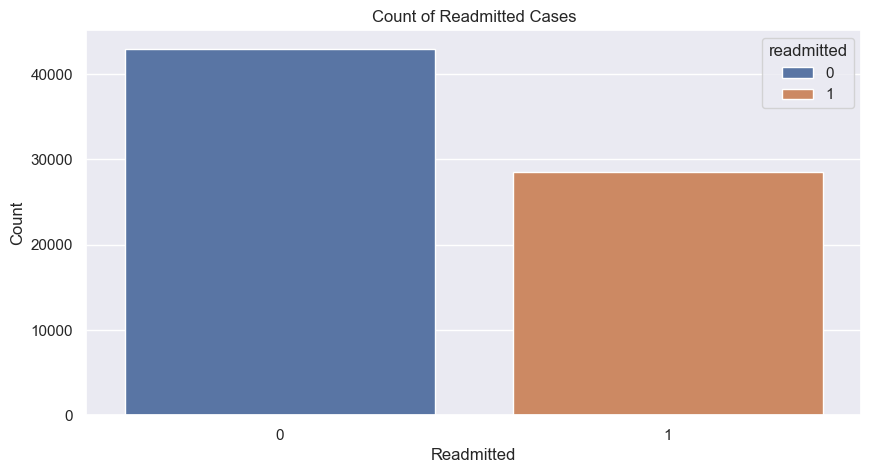

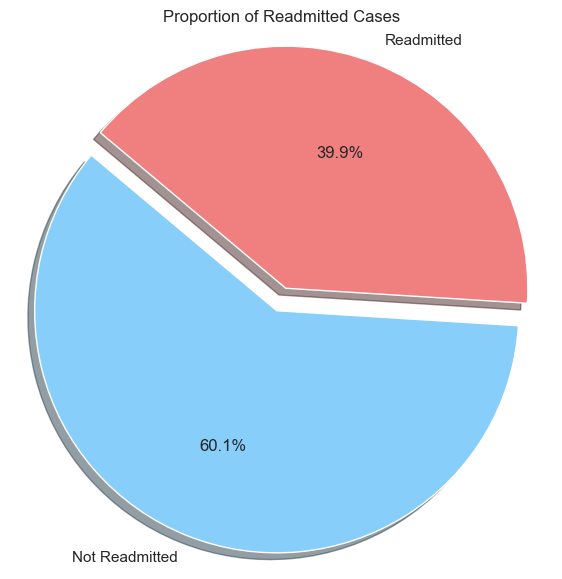

In [60]:
# Bar chart
plt.figure(figsize=(10, 5))
sns.countplot(x='readmitted', hue='readmitted', data=df_diabetes)
plt.title('Count of Readmitted Cases')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

# Pie chart
labels = ['Not Readmitted', 'Readmitted']
sizes = df_diabetes['readmitted'].value_counts(normalize=True) * 100
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion of Readmitted Cases')
plt.show()


Since the proportion of "No" labels is around 60.1% and "Yes" labels is around 39.9%, the dataset is not perfectly balanced, but it's also not severely imbalanced.

For learning purpose, I'll treat the dataset as 'balanced'. 

#### Between 'age_mean' and 'readmitted'

<Axes: xlabel='age_mean', ylabel='count'>

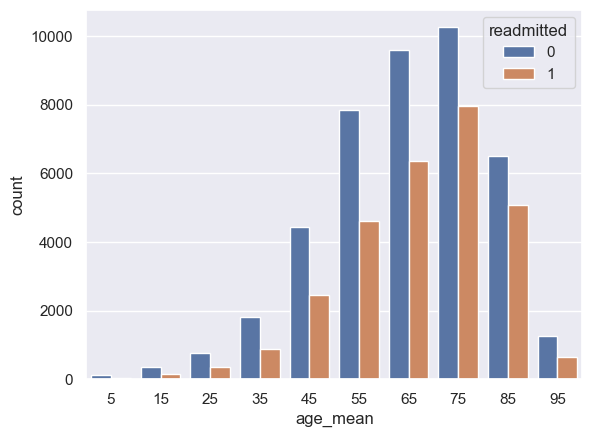

In [61]:
sns.countplot(x='age_mean',hue='readmitted',data=df_diabetes)

We determined that most of the patients belong to the age range of 50 to 80 years, and we classified patients according to readmission status (ie, if the patient presents a case of readmission greater than or less than 30 days, and no readmission. It shows the relationship between age and patient readmission, demonstrating very few cases of readmission for younger patients (under 40 years of age).

sns.countplot(x='readmitted',hue='gender',data=df)


#### Between time_in_hospital and mean_age 

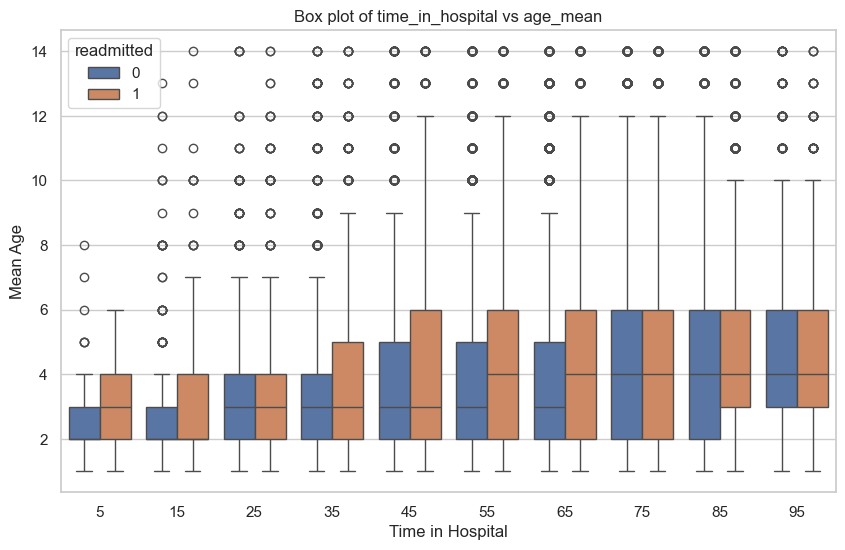

In [62]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(y='time_in_hospital', x='age_mean',hue='readmitted', data=df_diabetes)
plt.title('Box plot of time_in_hospital vs age_mean')
plt.xlabel('Time in Hospital')
plt.ylabel('Mean Age')
plt.show()

Most of patient are having higher age. The patient who have readmitted tend to have higher age and higher time spend in the hospital. Not readmitted patient spending less time in the hospital.

In [63]:
#### Between number_inpatient and mean_age 

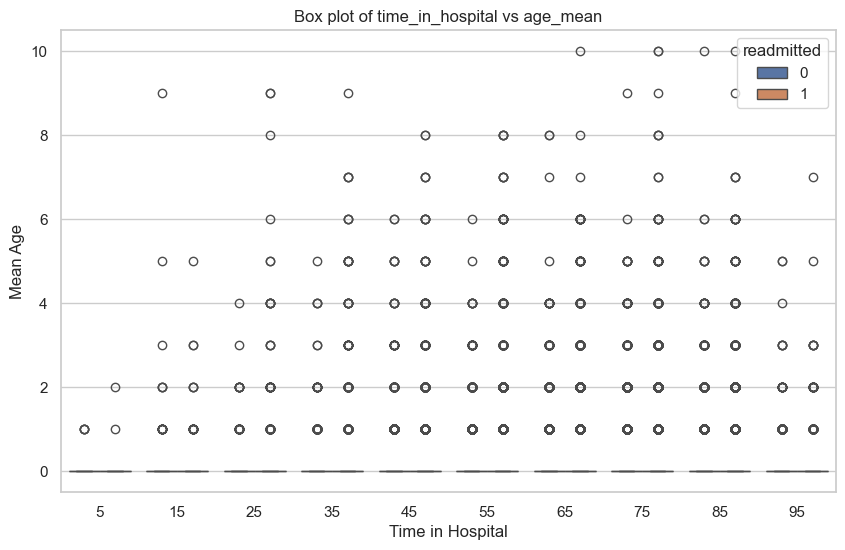

In [64]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(y='number_inpatient', x='age_mean',hue='readmitted', data=df_diabetes)
plt.title('Box plot of time_in_hospital vs age_mean')
plt.xlabel('Time in Hospital')
plt.ylabel('Mean Age')
plt.show()

#### Between 'gender' and 'readmitted'

In [65]:
custom_palette = {"Male": "blue", "Female": "pink","Unknown/Invalid":"yellow" }


<Axes: xlabel='readmitted', ylabel='count'>

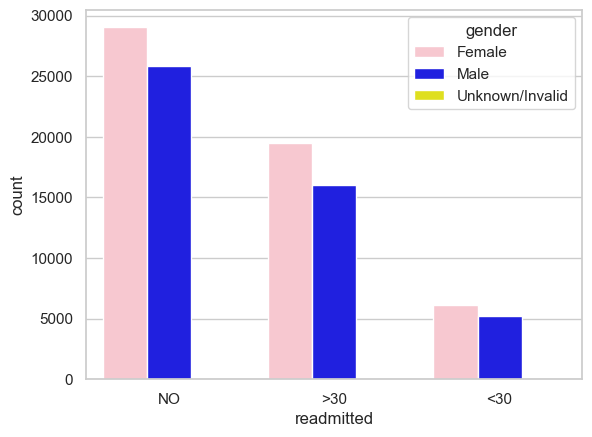

In [66]:
sns.countplot(x='readmitted',hue='gender',palette=custom_palette, data=df)

In addition, women had a slightly higher readmission rate than men in cases of readmission longer than 30 days. Readmission showed a similar distribution for patients with and without medication prescribed for diabetes prior to hospital treatment.

#### Race, max_glu_serum and A1Cresult

<Axes: xlabel='race', ylabel='count'>

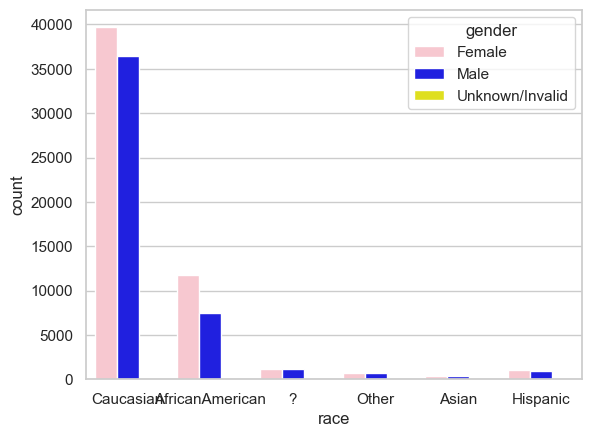

In [67]:
# Race
sns.countplot(x='race',hue='gender',palette=custom_palette,data=df)

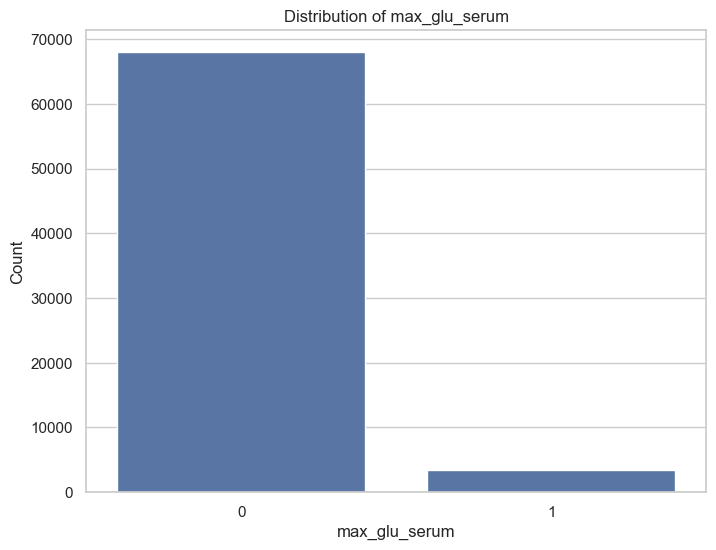

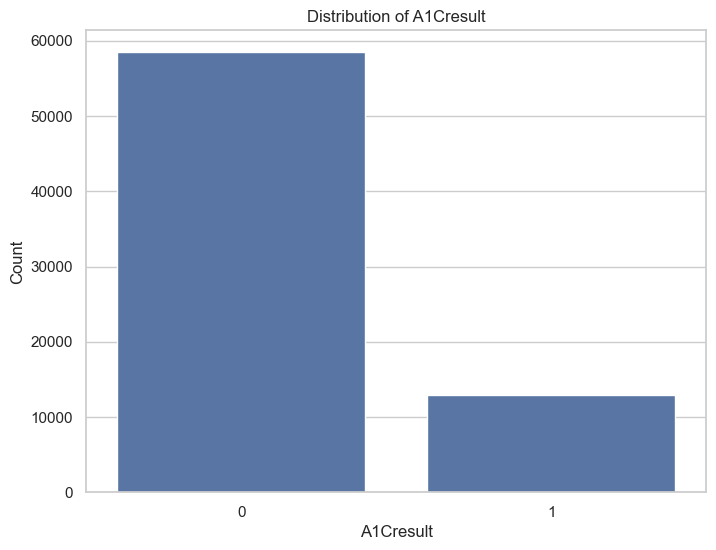

In [68]:
# Plot for max_glu_serum
plt.figure(figsize=(8, 6))
sns.countplot(x='max_glu_serum', data=df_diabetes)
plt.title('Distribution of max_glu_serum')
plt.xlabel('max_glu_serum')
plt.ylabel('Count')
plt.show()

# Plot for A1Cresult
plt.figure(figsize=(8, 6))
sns.countplot(x='A1Cresult', data=df_diabetes)
plt.title('Distribution of A1Cresult')
plt.xlabel('A1Cresult')
plt.ylabel('Count')
plt.show()

In addition, we determined that the majority of the patients were of the Caucasian race and did not have a glucose or hemoglobin A1C test.

#### Discharge Disposition ID

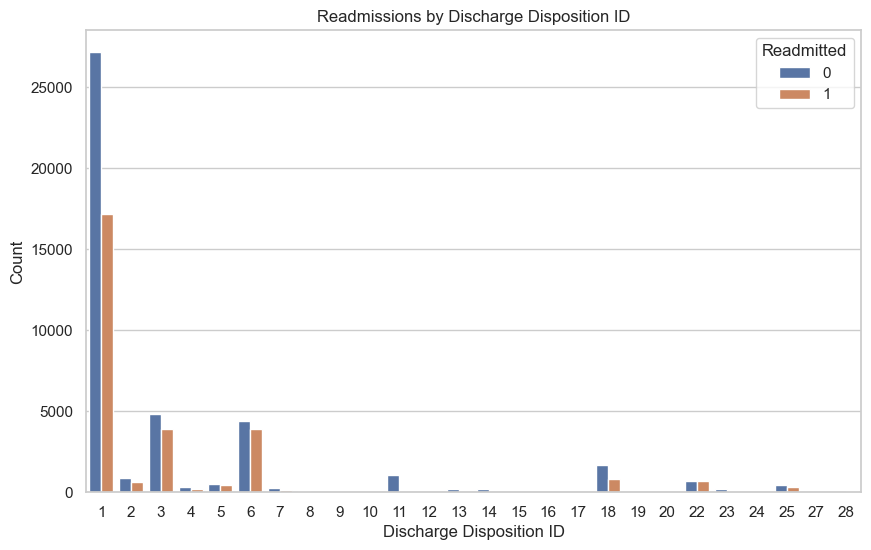

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df_diabetes)
plt.title('Readmissions by Discharge Disposition ID')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


From the graph it clear that if discharge disposition id is 18 the patient won’t readmit.

#### Diabetes Medication

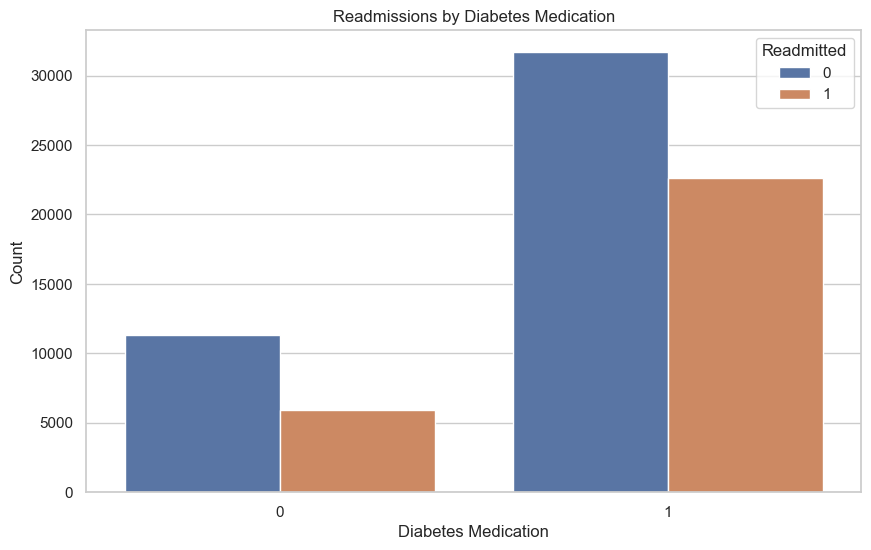

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=df_diabetes)
plt.title('Readmissions by Diabetes Medication')
plt.xlabel('Diabetes Medication')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


This feature tells weather the patient has taken Diabetes Medication or not. In our dataset Number of patient taken Diabetes Medication and “readmitted” is almost same as number of patients taken Diabetes medication and “not readmitted”. But the by interacting with other feature Diabetes Med might reveal lot of information that is useful for given task.

#### Between Change and DiabetesMed

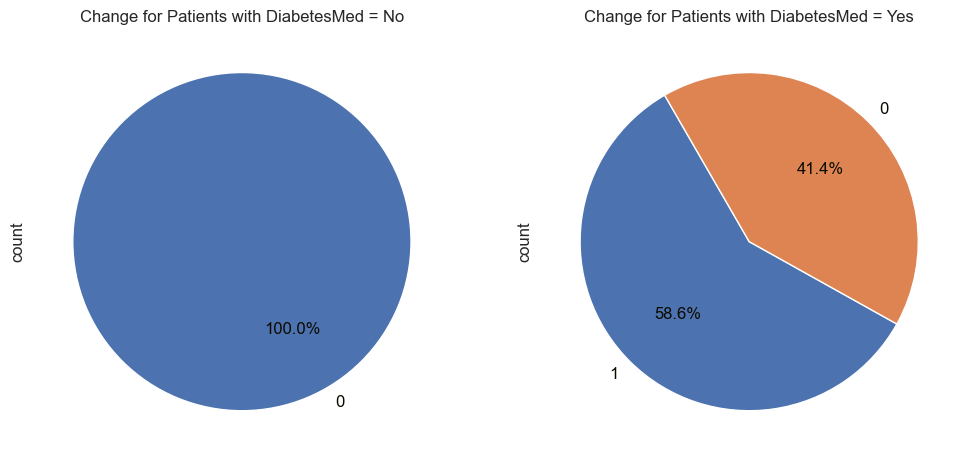

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for patients with diabetesMed 'No'
data_no_diabetesMed = df_diabetes[(df_diabetes['readmitted'] == 0) & (df_diabetes['diabetesMed'] == 0)]
ax = data_no_diabetesMed['change'].value_counts().plot.pie(ax=axes[0], autopct="%1.1f%%", startangle=120, textprops={'fontsize': 12, 'color':'#0a0a00'})
ax.set_title('Change for Patients with DiabetesMed = No')

# Plot for patients with diabetesMed 'Yes'
data_yes_diabetesMed = df_diabetes[(df_diabetes['readmitted'] == 0) & (df_diabetes['diabetesMed'] == 1)]
ax = data_yes_diabetesMed['change'].value_counts().plot.pie(ax=axes[1], autopct="%1.1f%%", startangle=120, textprops={'fontsize': 12, 'color':'#0a0a00'})
ax.set_title('Change for Patients with DiabetesMed = Yes')

plt.show()


From pie chart it clear that if the patient has no changes in medication and has not taken any diabetic medication he has more chance of getting readmitted than the patient who has taken diabetesMed and has no changes in medication.

#### Number of lab procedure

/var/folders/kt/rg6_d5c90v16qpfm3hltsfb80000gn/T/ipykernel_30632/3218005219.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_diabetes[df_diabetes['readmitted'] == 0]['num_lab_procedures'], color='blue', shade=True, label='Readmitted = 0')
/var/folders/kt/rg6_d5c90v16qpfm3hltsfb80000gn/T/ipykernel_30632/3218005219.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_diabetes[df_diabetes['readmitted'] == 1]['num_lab_procedures'], color='red', shade=True, label='Readmitted = 1')


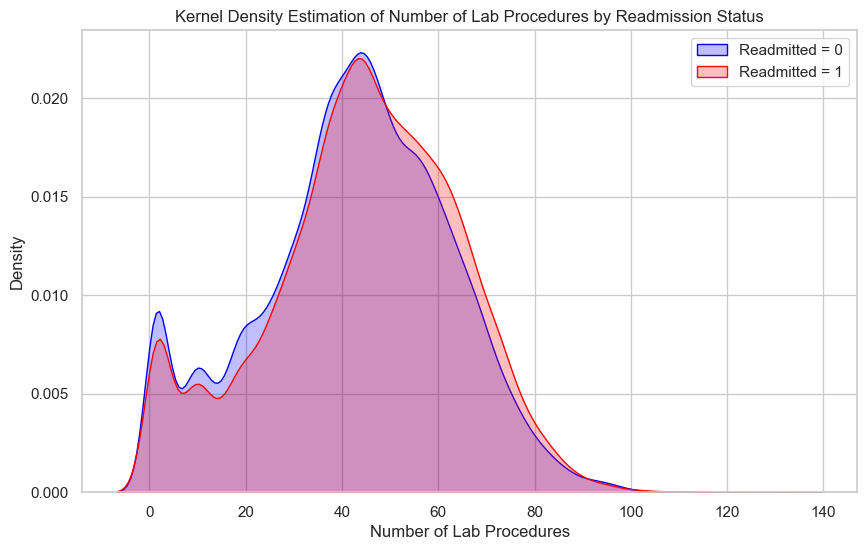

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot kernel density estimation for readmitted = 0
sns.kdeplot(data=df_diabetes[df_diabetes['readmitted'] == 0]['num_lab_procedures'], color='blue', shade=True, label='Readmitted = 0')

# Plot kernel density estimation for readmitted = 1
sns.kdeplot(data=df_diabetes[df_diabetes['readmitted'] == 1]['num_lab_procedures'], color='red', shade=True, label='Readmitted = 1')

# Add title and labels
plt.title('Kernel Density Estimation of Number of Lab Procedures by Readmission Status')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Distribution Number of lab procedures for readmitted and not readmitted patient is exactly same. But it has high variance. High variance features are considered information rich features.

## Pair plot between subset of numerical features

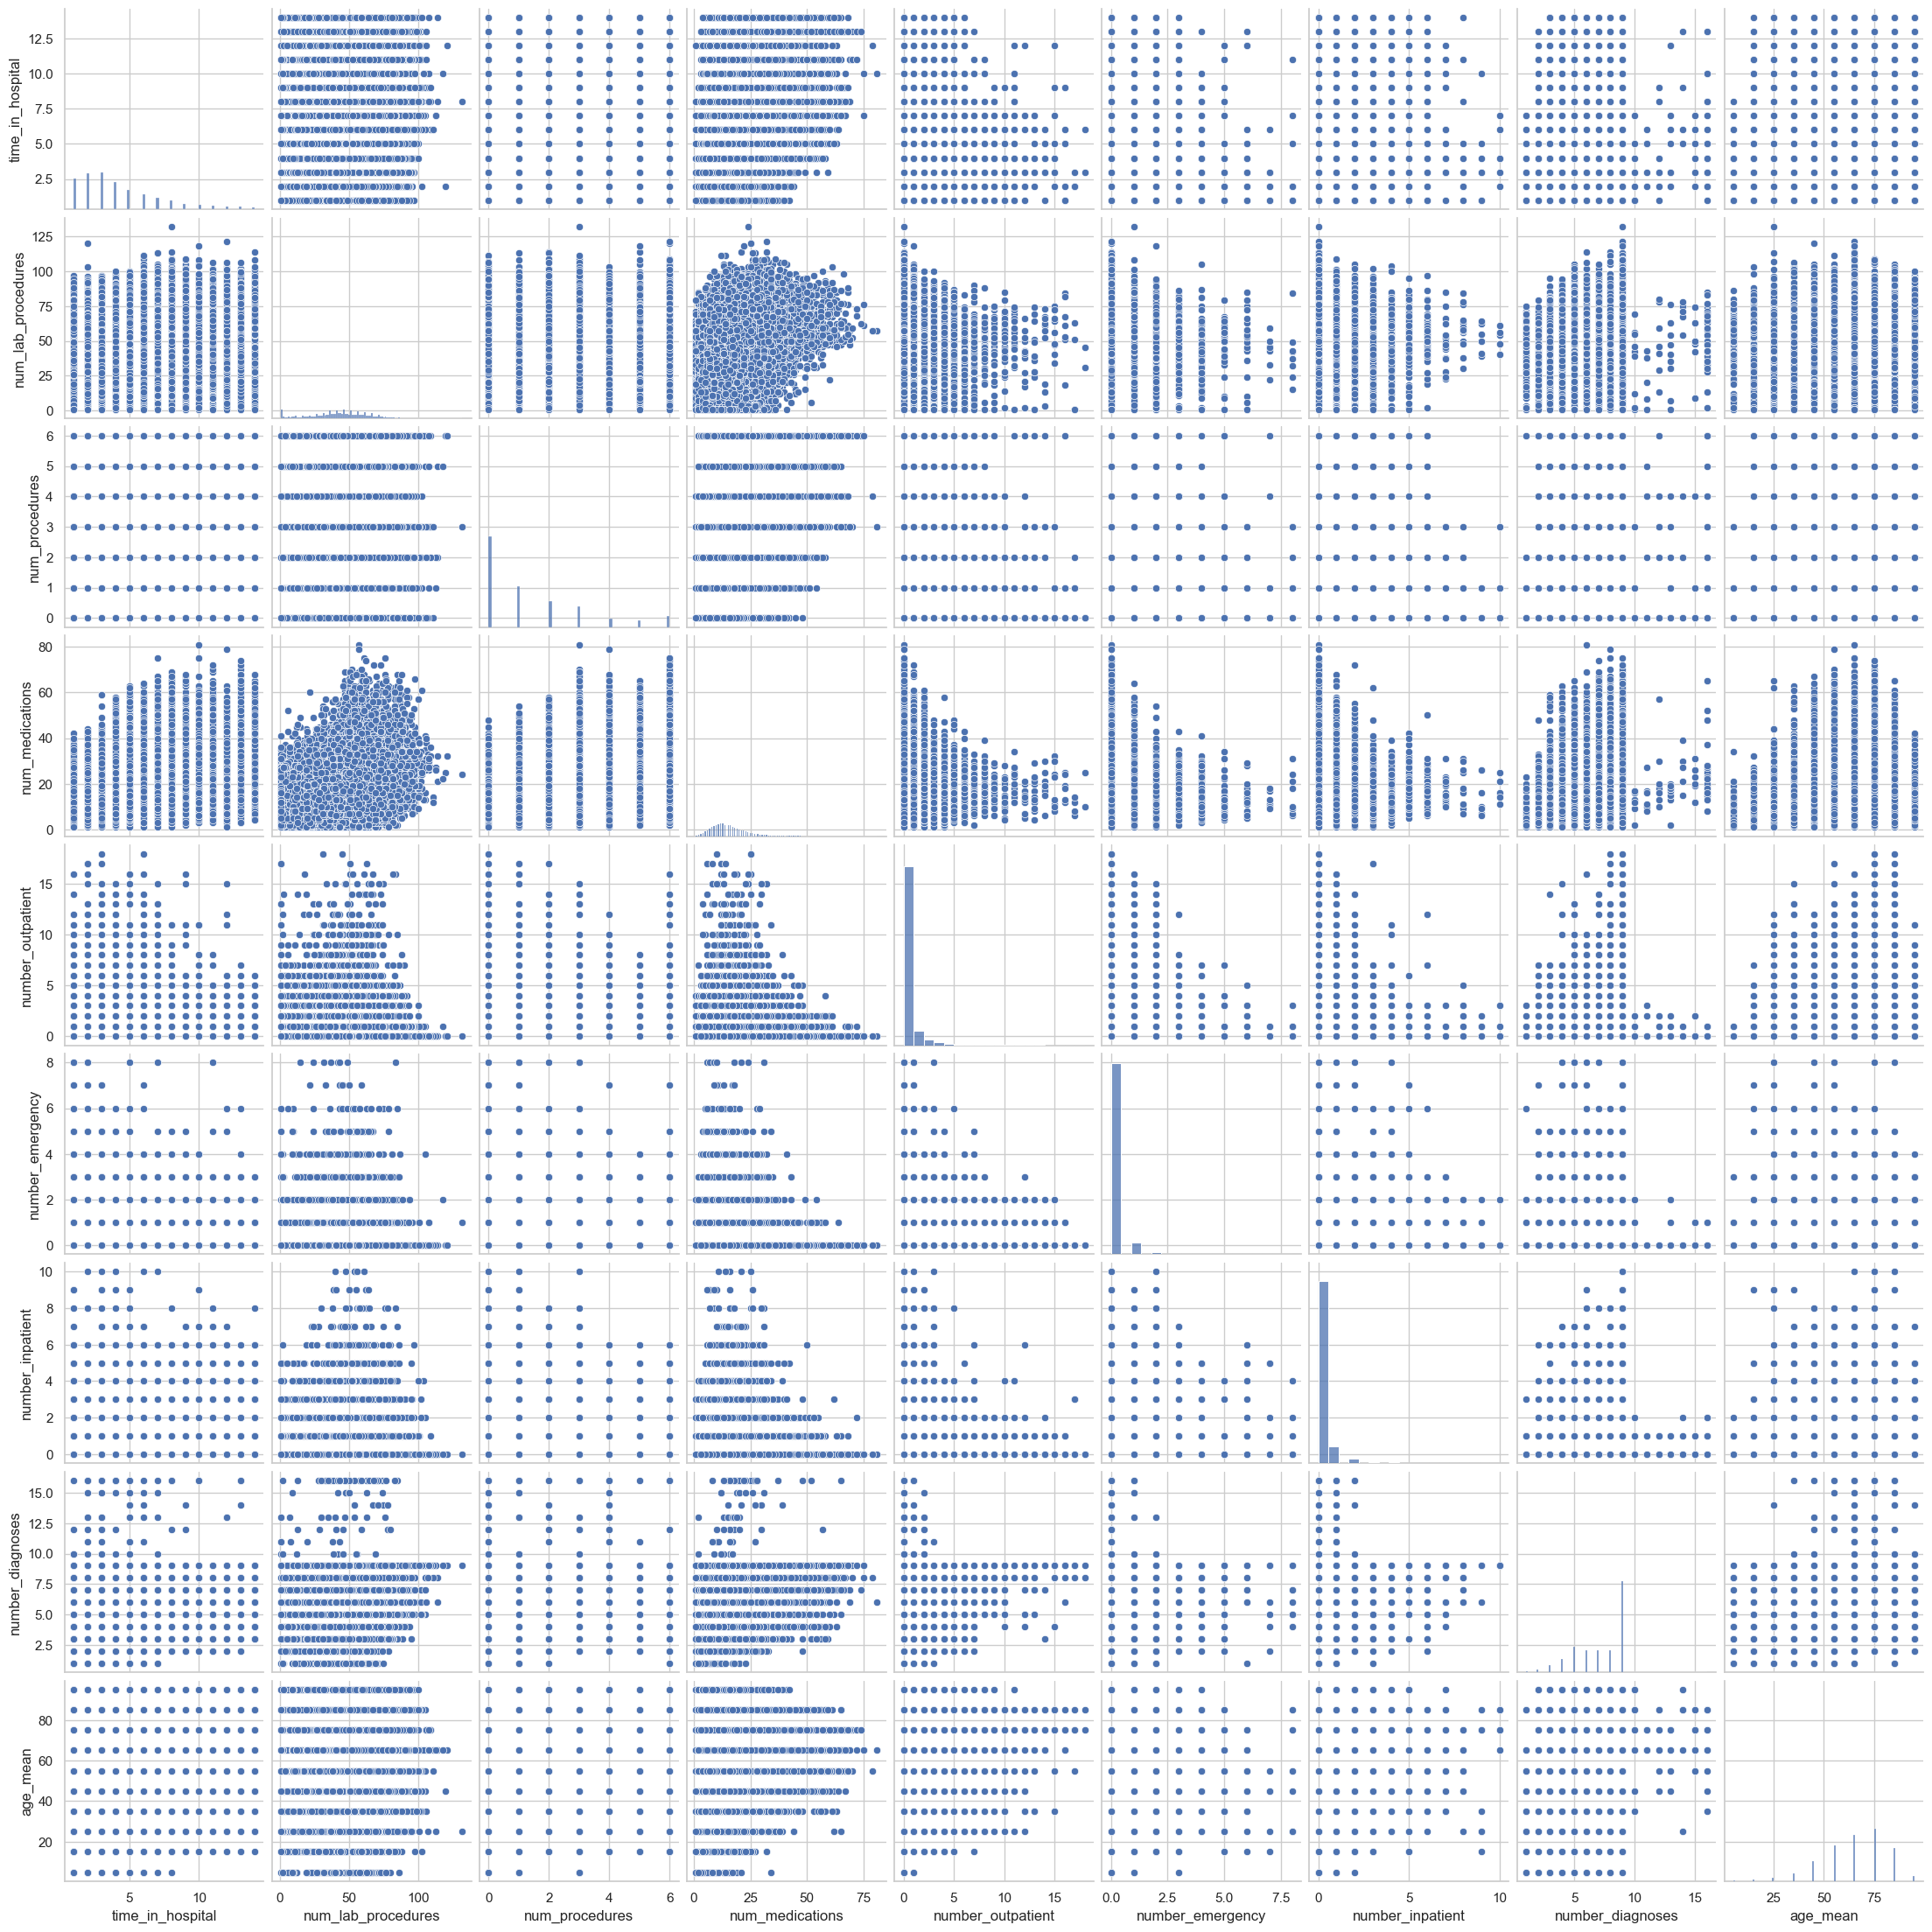

In [73]:
sns.pairplot(df_diabetes[num_cols])

plt.show()


We see that there is no strong linear relationship between each pair. 

#### Calculate correlation matrix

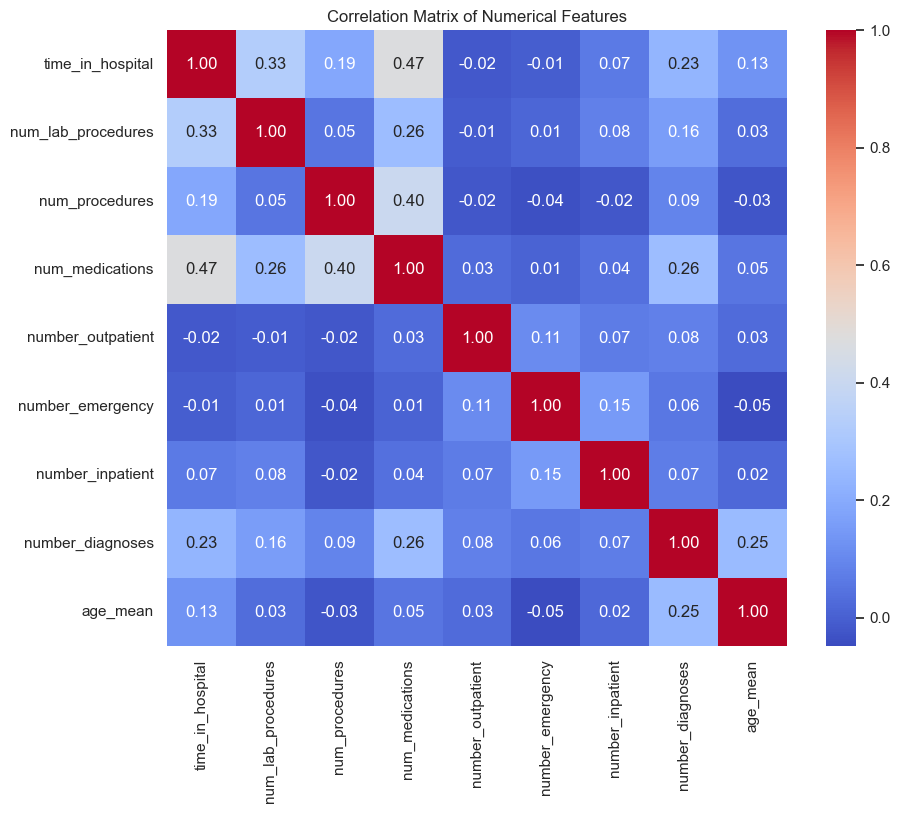

In [935]:
corr_matrix = df_diabetes[num_cols].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix suggests that some features, particularly time_in_hospital, num_medications, and number_diagnoses, are modestly correlated. However, the overall correlations are not strong enough to be a significant concern for multicollinearity. 

## Detecting Multicollinearity with VIF 

In [936]:
import statsmodels.api as sm

In [937]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [938]:
X_num = sm.add_constant(df_diabetes[num_cols])

# Calculate VIF
vif = pd.DataFrame()
vif["Features"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

# Print VIF values
print(vif)

             Features        VIF
0               const  28.568668
1    time_in_hospital   1.396627
2  num_lab_procedures   1.156227
3      num_procedures   1.207457
4     num_medications   1.550366
5   number_outpatient   1.023172
6    number_emergency   1.041052
7    number_inpatient   1.037186
8    number_diagnoses   1.175414
9            age_mean   1.086305


These VIF values indicate the extent of multicollinearity between each feature and the other features in the dataset. Here's how to interpret the results:

VIF = 1: No multicollinearity. The variance of the coefficient estimates is not inflated at all.

1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient estimates is moderate but not problematic.

VIF >= 5: High multicollinearity. The variance of the coefficient estimates is significantly inflated, indicating strong multicollinearity among the variables.

Based on the result above, we see that:

- The constant term (const) has a high VIF, indicating that it may be collinear with other features.

- All other features have VIF values below 5, which suggests there is no significant multicollinearity among them.

# Standardize the numerical variables

In [939]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_diabetes[num_cols] = scaler.fit_transform(df_diabetes[num_cols])

In [940]:
df_diabetes.shape

(71472, 27)

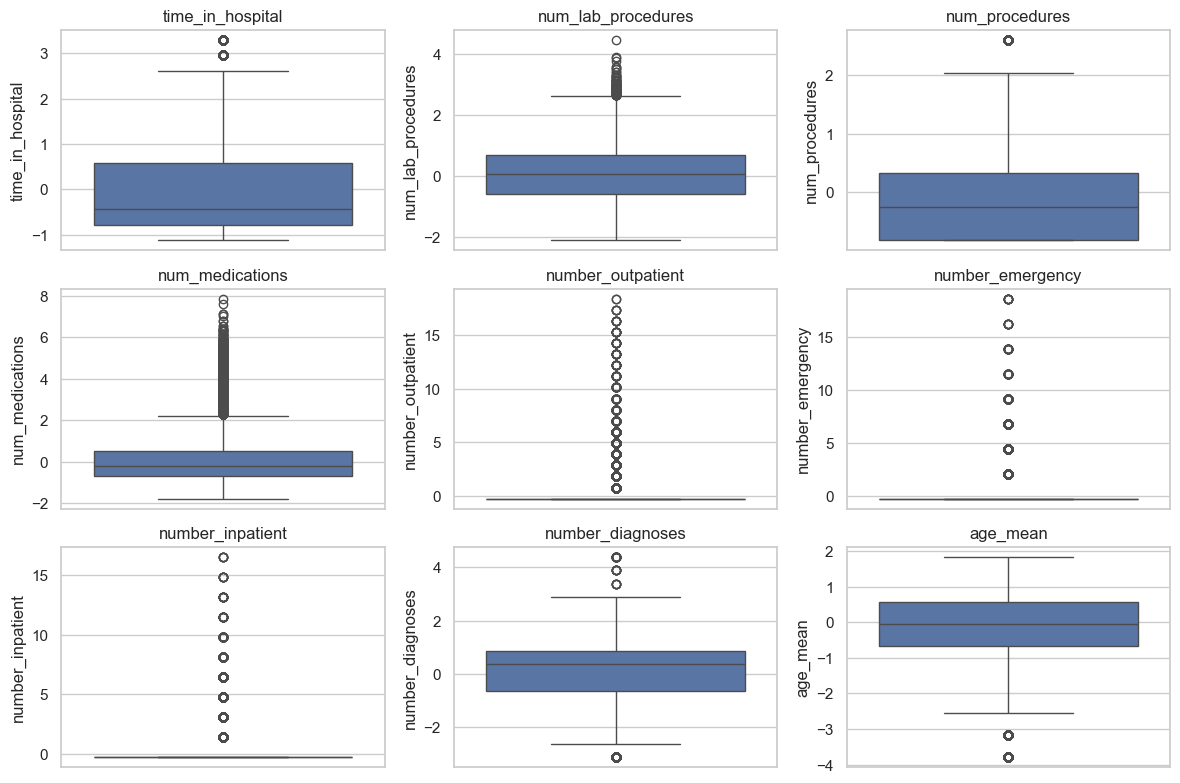

In [941]:

# Numerical columns
num_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
            'num_medications', 'number_outpatient', 'number_emergency', 
            'number_inpatient', 'number_diagnoses', 'age_mean']

# Box plots for outlier detection
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_diabetes[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [942]:
df_diabetes_cleaned1 = df_diabetes.copy()

In [1017]:
df_diabetes_cleaned1.shape

(71472, 27)

In [943]:
df_diabetes_cleaned2 = df_diabetes.copy()

In [1145]:
df_diabetes_cleaned2.shape

(71472, 27)

# I. Applying PCA

In [1031]:
df_diabetes_scaled = df_diabetes[num_cols]
df_diabetes_scaled.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_mean
0,-1.115353,-0.103836,-0.813054,-1.769152,-0.282694,-0.235306,-0.296513,-3.130759,-3.796623
1,-0.437229,0.798317,-0.813054,0.276159,-0.282694,-0.235306,-0.296513,0.879692,-3.170685
2,-0.776291,-1.607424,2.028122,-0.325403,1.799082,-0.235306,1.383687,-0.624227,-2.544747
3,-0.776291,0.046523,-0.244818,0.035534,-0.282694,-0.235306,-0.296513,-0.122921,-1.918809
4,-1.115353,0.397360,-0.813054,-0.926965,-0.282694,-0.235306,-0.296513,-1.125534,-1.292871


#### Applying PCA

In [1032]:
from sklearn.decomposition import PCA


In [1066]:
pca = PCA(len(num_cols))
pca_result = pca.fit_transform(df_diabetes_scaled)

In [1125]:
# Explained variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

## Apply the Kaiser criterion to choose the optimal components

In [ ]:
kaiser_criterion = explained_variance > 1
optimal_num_components = np.sum(kaiser_criterion)

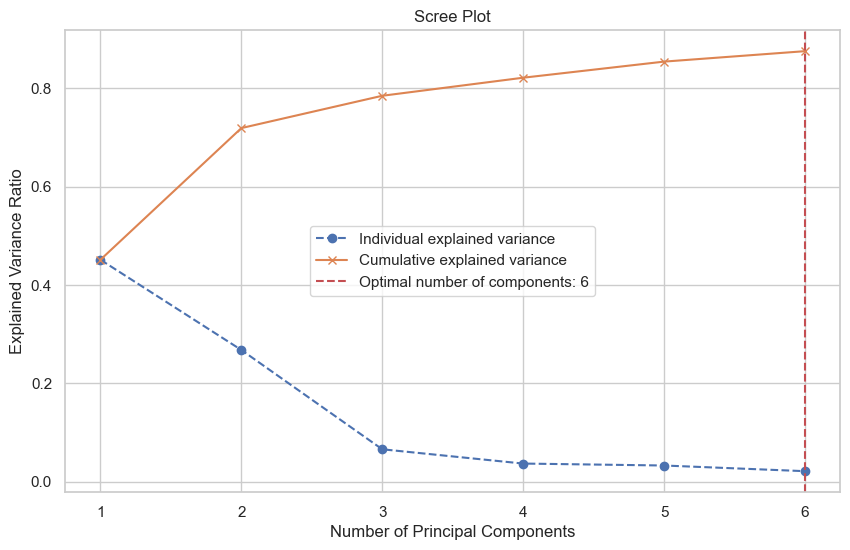

The optimal number of principal components according to the Kaiser criterion is: 6


In [1126]:
# Scree plot (elbow plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='x', linestyle='-', label='Cumulative explained variance')
plt.axvline(optimal_num_components, color='r', linestyle='--', label=f'Optimal number of components: {optimal_num_components}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

print(f'The optimal number of principal components according to the Kaiser criterion is: {optimal_num_components}')


The Kaiser criterion is applied to determine the optimal number of components (those with eigenvalues > 1).

The Scree plot showing individual and cumulative explained variance ratios and it show that the optimal number of components I should choose is 6. 

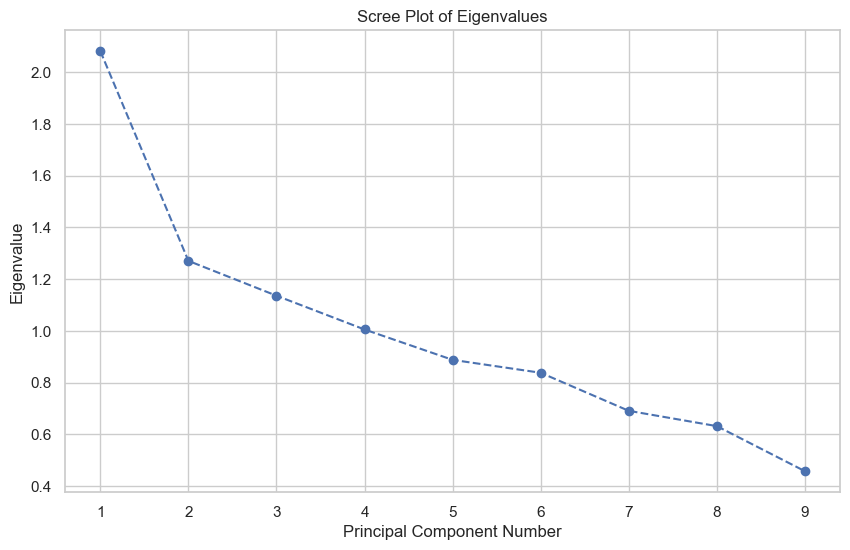

In [1035]:
# Eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Eigenvalues')
plt.grid(True)
plt.show()

The full scree plot suggests that using 6 or 7 principal components will capture a significant portion of the variability, offering a good balance between dimensionality reduction and information retention. 

However, in order to evaluate the effects of different PCAs, I will test the model by using :

- PCA = 6 ( Capture 80% of the variability, 6 components)

- PCA = 9 ( Capture 99% of the variability, full components)

- PCA =2 (Least priority because it capture less than 40% of the variability but it has only 2 components)

In [1036]:
cumulative_variance_ratio = np.sum(pca.explained_variance_ratio_[:6])
print("Cumulative explained variance ratio up to 6 components:", cumulative_variance_ratio)


Cumulative explained variance ratio up to 6 components: 0.8020749237937711


By choosing 6 components as the optimmal number, we can capture 80% of the initial variance of the original subset of numeric variable

#### Data preparation for Training and Testing 

In [1070]:
pca = PCA(n_components = 6)
pca_result = pca.fit_transform(df_diabetes_scaled)

In [1071]:
# Concatenate principal components DataFrame with the categorical variables DataFrame

# Reset index of df_diabetes[cat_cols]
df_diabetes_cat_reset_index = df_diabetes[cat_cols].reset_index(drop=True)

# Concatenate principal components DataFrame with the categorical variables DataFrame
merged_data = pd.concat([principalDf, df_diabetes_cat_reset_index], axis=1)
merged_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6,race,gender,admission_type_id,discharge_disposition_id,...,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,diag_1_ICD9_encoded
0,-3.761518,-1.460915,3.064693,-1.255688,1.359295,-0.332883,1,0,6,25,...,0,0,0,0,0,0,0,0,0,3
1,-0.338261,-0.553259,1.629970,-0.908310,1.195623,0.479002,1,0,1,1,...,0,0,0,0,0,3,1,1,1,0
2,-0.992153,-0.062968,2.865615,2.196834,-0.230530,-1.961049,0,0,1,1,...,0,2,0,0,0,0,0,1,0,0
3,-0.886185,-0.726124,1.148838,-0.253640,0.463924,0.140773,1,1,1,1,...,0,0,0,0,0,3,1,1,0,0
4,-1.907887,-0.466318,0.752700,-0.881342,0.761995,0.023468,1,1,1,1,...,0,2,0,0,0,2,1,1,0,8


In [1045]:
merged_data.shape

(71472, 24)

#### Capture 95 % of the initial variance of the original subset of numeric variable

In [1041]:
pca1 = PCA(0.95)
pca_result1 = pca1.fit_transform(df_diabetes_scaled)

pca1.n_components_ 

9

In [1043]:
principalDf1 = pd.DataFrame(data=pca_result1, columns = ['PC1','PC2','PC3','PC4','PC5','PC6', 'PCA7', 'PCA8','PCA9' ])

# Concatenate principal components DataFrame with the categorical variables DataFrame
merged_data1 = pd.concat([principalDf1, df_diabetes_cat_reset_index], axis=1)


In [1044]:
merged_data1.shape

(71472, 27)

In [ ]:
pca1 = PCA(0.95)
pca_result1 = pca1.fit_transform(df_diabetes_scaled)

pca1.n_components_ 

#### Capture 37% of the initial variance of the original subset of numeric variable

In [1079]:
cumulative_variance_ratio = np.sum(pca.explained_variance_ratio_[:2])
print("Cumulative explained variance ratio up to 2 components:", cumulative_variance_ratio)


Cumulative explained variance ratio up to 2 components: 0.37234231006225804


In [1072]:
pca2 = PCA(n_components = 2)
pca_result2 = pca2.fit_transform(df_diabetes_scaled)


In [1076]:
principalDf2 = pd.DataFrame(data=pca_result2, columns = ['PC1','PC2'])

# Concatenate principal components DataFrame with the categorical variables DataFrame
merged_data2 = pd.concat([principalDf2, df_diabetes_cat_reset_index], axis=1)


In [1077]:
merged_data2.head()

,PC1,PC2,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,diag_1_ICD9_encoded
0,-3.761518,-1.460915,1,0,6,25,1,0,0,0,0,0,0,0,0,0,0,0,0,3
1,-0.338261,-0.553259,1,0,1,1,7,0,0,0,0,0,0,0,0,3,1,1,1,0
2,-0.992153,-0.062968,0,0,1,1,7,0,0,0,0,2,0,0,0,0,0,1,0,0
3,-0.886185,-0.726124,1,1,1,1,7,0,0,0,0,0,0,0,0,3,1,1,0,0
4,-1.907887,-0.466318,1,1,1,1,7,0,0,0,0,2,0,0,0,2,1,1,0,8


# 1. PCA with Random Forest Classifier

# 1.1. PCA = 6 with Random Forest Classifier

## Train/test split

I'm using different methods to train models and some classifiers take more than time I expected. For example, SHAPRFE + Random Forest takes more than 2 hours to run for the whole dataset. 

To expedite this process for learning purpose, I propose employing random sampling to select a subset of the data 10,000 entries only.

#### Method: Simple Random Sampling

This strategy is particularly advantageous due to the balanced distribution of the target variable, with "Yes" (60) and "No" (40%) labels occurring in similar proportions. 

Implementing random sampling serves as an efficient means to reduce dataset size without compromising accuracy, making it a valuable technique for handling large datasets in a timely and resource-efficient manner.

In [1046]:
from sklearn.model_selection import train_test_split

# Sample 10,000 rows from merged_data
df_sampled = merged_data.sample(n=10000, random_state=42)

X_sampled = df_sampled.drop(['readmitted'], axis=1)
y_sampled = df_sampled['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, shuffle=True, stratify=y_sampled, random_state=42)


In [1048]:
from sklearn.ensemble import RandomForestClassifier

In [1049]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train, y_train)

## Test and evalucation

In [1061]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [1062]:
# Initialize and fit RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1819
           1       0.53      0.31      0.39      1181

    accuracy                           0.62      3000
   macro avg       0.59      0.57      0.56      3000
weighted avg       0.60      0.62      0.59      3000

Confusion Matrix:
[[1497  322]
 [ 813  368]]
Precision: 0.533
Recall: 0.312
F-score: 0.393
Support: None
AUC: 0.621
Accuracy: 0.622


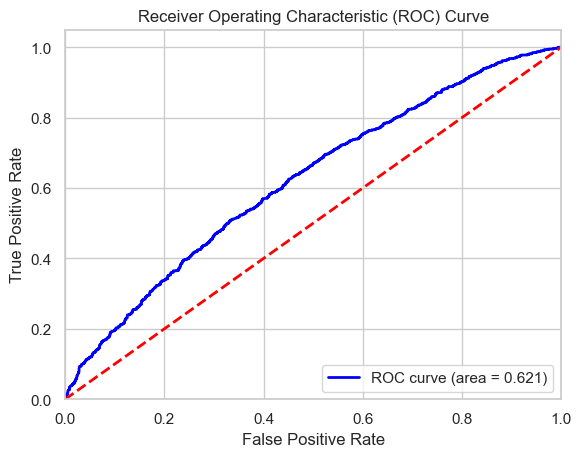

In [1063]:
# Predict
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate precision, recall, fscore, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Print metrics
print(f'Precision: {round(precision, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'F-score: {round(fscore, 3)}')
print(f'Support: {support}')
print(f'AUC: {round(auc, 3)}')
print(f'Accuracy: {round(accuracy, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {round(auc, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 1.2. PCA = 9 with Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.82      0.72      1819
           1       0.53      0.31      0.40      1181

    accuracy                           0.62      3000
   macro avg       0.59      0.57      0.56      3000
weighted avg       0.60      0.62      0.60      3000

Confusion Matrix:
[[1494  325]
 [ 809  372]]
Precision: 0.534
Recall: 0.315
F-score: 0.396
Support: None
AUC: 0.609
Accuracy: 0.622


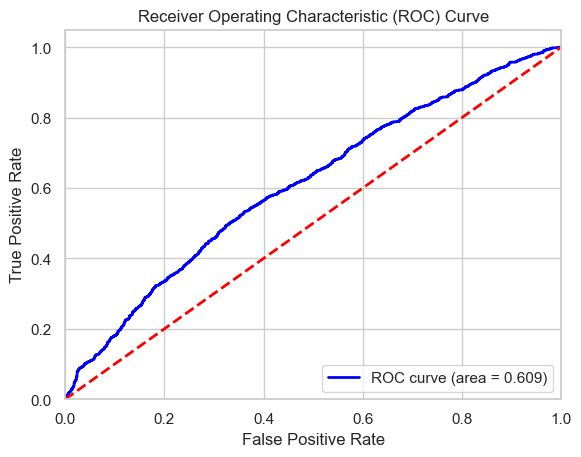

In [1128]:
# Sample the merged_data1 DataFrame
df_sampled1 = merged_data1.sample(n=10000, random_state=42)

# Split into features (X) and target (y)
X_sampled1 = df_sampled1.drop(['readmitted'], axis=1)
y_sampled1 = df_sampled1['readmitted']

# Split the sampled data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sampled1, y_sampled1, test_size=0.3, shuffle=True, stratify=y_sampled1, random_state=42)

# Initialize and fit RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model1 = rf.fit(X_train1, y_train1)

# Predict
y_pred1 = rf_model1.predict(X_test1)
y_pred_proba1 = rf_model1.predict_proba(X_test1)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))

# Calculate precision, recall, fscore, and support
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test1, y_pred1, pos_label=1, average='binary')
auc1 = roc_auc_score(y_test1, y_pred_proba1)
accuracy1 = accuracy_score(y_test1, y_pred1)
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_proba1, pos_label=1)

# Print metrics
print(f'Precision: {round(precision1, 3)}')
print(f'Recall: {round(recall1, 3)}')
print(f'F-score: {round(fscore1, 3)}')
print(f'Support: {support1}')
print(f'AUC: {round(auc1, 3)}')
print(f'Accuracy: {round(accuracy1, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {round(auc1, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 1.3. PCA = 2 with Random Forest Classifier

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1819
           1       0.50      0.31      0.38      1181

    accuracy                           0.60      3000
   macro avg       0.57      0.55      0.54      3000
weighted avg       0.58      0.60      0.58      3000

Confusion Matrix:
[[1453  366]
 [ 820  361]]
Precision: 0.497
Recall: 0.306
F-score: 0.378
Support: None
AUC: 0.598
Accuracy: 0.605


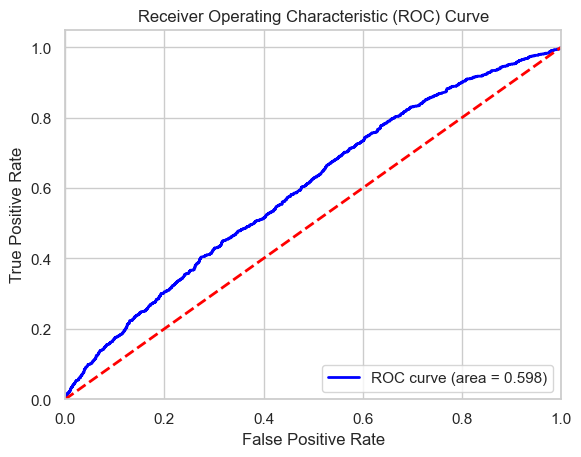

In [1129]:
# Sample the merged_data2 DataFrame
df_sampled2 = merged_data2.sample(n=10000, random_state=42)

# Split into features (X) and target (y)
X_sampled2 = df_sampled2.drop(['readmitted'], axis=1)
y_sampled2 = df_sampled2['readmitted']

# Split the sampled data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sampled2, y_sampled2, test_size=0.3, shuffle=True, stratify=y_sampled2, random_state=42)

# Initialize and fit RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model2 = rf.fit(X_train2, y_train2)

# Predict
y_pred2 = rf_model2.predict(X_test2)
y_pred_proba2 = rf_model2.predict_proba(X_test2)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

# Calculate precision, recall, fscore, and support
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test2, y_pred2, pos_label=1, average='binary')
auc2 = roc_auc_score(y_test2, y_pred_proba2)
accuracy2 = accuracy_score(y_test2, y_pred2)
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_proba2, pos_label=1)

# Print metrics
print(f'Precision: {round(precision2, 3)}')
print(f'Recall: {round(recall2, 3)}')
print(f'F-score: {round(fscore2, 3)}')
print(f'Support: {support2}')
print(f'AUC: {round(auc2, 3)}')
print(f'Accuracy: {round(accuracy2, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve (area = {round(auc2, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 2. PCA with GBM Classifier

In [1130]:
from sklearn.ensemble import GradientBoostingClassifier


## 2.1. PCA = 6 with GBM Classifier

In [1131]:
df_sampled = merged_data.sample(n=10000, random_state=42)

df_sampled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,race,gender,admission_type_id,discharge_disposition_id,...,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,diag_1_ICD9_encoded
33852,-0.755431,0.088528,-1.077594,-0.303000,-0.132234,0.135421,0,0,2,5,...,0,0,0,0,0,1,1,1,0,2
1603,1.943667,0.435747,-1.901819,-1.152146,0.513927,0.451619,0,0,1,3,...,0,3,0,0,0,2,1,1,1,4
62452,-0.562340,0.553540,-0.164437,0.217108,0.984663,0.098511,1,1,1,6,...,0,0,0,0,0,2,0,1,1,3
1870,-2.140962,-1.421949,2.857278,-0.853411,1.132554,-0.092010,1,1,2,6,...,0,0,0,0,0,2,0,1,0,2
21000,-1.571331,0.051057,-1.145999,-0.349040,-0.138225,-0.072585,1,1,1,1,...,0,0,0,0,0,2,0,1,1,0


In [1132]:
X_sampled = df_sampled.drop(['readmitted'], axis=1)
y_sampled = df_sampled['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, shuffle=True, stratify=y_sampled, random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74      1819
           1       0.58      0.24      0.34      1181

    accuracy                           0.63      3000
   macro avg       0.61      0.56      0.54      3000
weighted avg       0.62      0.63      0.59      3000

Confusion Matrix:
[[1609  210]
 [ 896  285]]
Precision: 0.576
Recall: 0.241
F-score: 0.34
Support: None
AUC: 0.634
Accuracy: 0.631


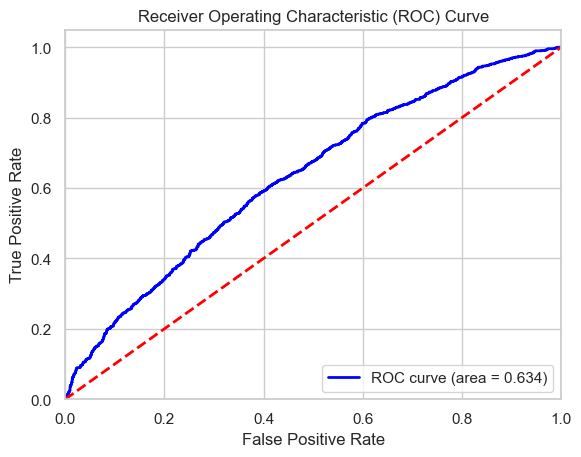

In [1133]:
# Initialize GBM classifier
gbm = GradientBoostingClassifier()

# Fit GBM classifier to training data
gbm.fit(X_train, y_train)

# Predict
y_pred_gbm = gbm.predict(X_test)
y_pred_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))

# Calculate precision, recall, fscore, and support
precision_gbm, recall_gbm, fscore_gbm, support_gbm = precision_recall_fscore_support(y_test, y_pred_gbm, pos_label=1, average='binary')
auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_proba_gbm, pos_label=1)

# Print metrics
print(f'Precision: {round(precision_gbm, 3)}')
print(f'Recall: {round(recall_gbm, 3)}')
print(f'F-score: {round(fscore_gbm, 3)}')
print(f'Support: {support_gbm}')
print(f'AUC: {round(auc_gbm, 3)}')
print(f'Accuracy: {round(accuracy_gbm, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (area = {round(auc_gbm, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2.2. PCA = 9 with GBM Classifier

In [1134]:
df_sampled1 = merged_data1.sample(n=10000, random_state=42)

df_sampled1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PCA7,PCA8,PCA9,race,...,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,diag_1_ICD9_encoded
33852,-0.755431,0.088528,-1.077594,-0.303000,-0.132234,0.135421,0.534854,1.080582,-0.974006,0,...,0,0,0,0,0,1,1,1,0,2
1603,1.943667,0.435747,-1.901819,-1.152146,0.513927,0.451619,0.754383,0.431031,-0.400491,0,...,0,3,0,0,0,2,1,1,1,4
62452,-0.562340,0.553540,-0.164437,0.217108,0.984663,0.098511,-1.361791,-0.282041,0.599616,1,...,0,0,0,0,0,2,0,1,1,3
1870,-2.140962,-1.421949,2.857278,-0.853411,1.132554,-0.092010,-1.027532,0.546587,-0.502954,1,...,0,0,0,0,0,2,0,1,0,2
21000,-1.571331,0.051057,-1.145999,-0.349040,-0.138225,-0.072585,1.208179,-0.144324,-0.121806,1,...,0,0,0,0,0,2,0,1,1,0


In [1135]:
# Split into features (X) and target (y)
X_sampled1 = df_sampled1.drop(['readmitted'], axis=1)
y_sampled1 = df_sampled1['readmitted']

# Split the sampled data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sampled1, y_sampled1, test_size=0.3, shuffle=True, stratify=y_sampled1, random_state=42)


In [1136]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GBM classifier
gbm1 = GradientBoostingClassifier()

# Fit GBM classifier to training data
gbm1.fit(X_train1, y_train1)

# Predict
y_pred_gbm1 = gbm1.predict(X_test1)
y_pred_proba_gbm1 = gbm1.predict_proba(X_test1)[:, 1]


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.87      0.74      1819
           1       0.56      0.25      0.34      1181

    accuracy                           0.63      3000
   macro avg       0.60      0.56      0.54      3000
weighted avg       0.61      0.63      0.58      3000

Confusion Matrix:
[[1583  236]
 [ 886  295]]
Precision: 0.556
Recall: 0.25
F-score: 0.345
Support: None
AUC: 0.635
Accuracy: 0.626


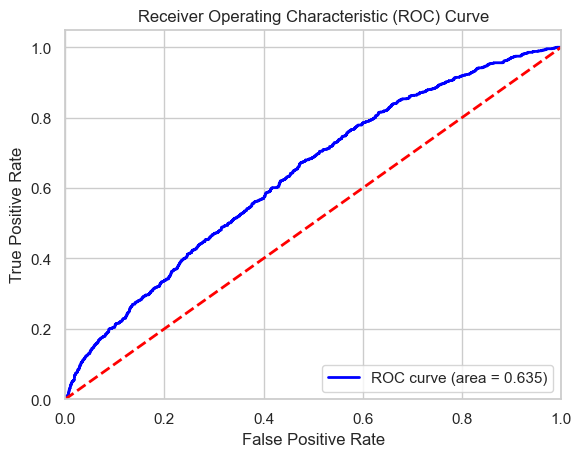

In [1137]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test1, y_pred_gbm1))

print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_gbm1))

# Calculate precision, recall, fscore, and support
precision_gbm, recall_gbm, fscore_gbm, support_gbm = precision_recall_fscore_support(y_test1, y_pred_gbm1, pos_label=1, average='binary')
auc_gbm = roc_auc_score(y_test1, y_pred_proba_gbm1)
accuracy_gbm = accuracy_score(y_test1, y_pred_gbm1)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test1, y_pred_proba_gbm1, pos_label=1)

# Print metrics
print(f'Precision: {round(precision_gbm, 3)}')
print(f'Recall: {round(recall_gbm, 3)}')
print(f'F-score: {round(fscore_gbm, 3)}')
print(f'Support: {support_gbm}')
print(f'AUC: {round(auc_gbm, 3)}')
print(f'Accuracy: {round(accuracy_gbm, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (area = {round(auc_gbm, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 2.2. PCA = 2 with GBM Classifier


In [1138]:
df_sampled2 = merged_data2.sample(n=10000, random_state=42)

df_sampled2.head()

,PC1,PC2,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,diag_1_ICD9_encoded
33852,-0.755431,0.088528,0,0,2,5,7,0,0,0,0,0,0,0,0,1,1,1,0,2
1603,1.943667,0.435747,0,0,1,3,7,0,0,0,0,3,0,0,0,2,1,1,1,4
62452,-0.562340,0.553540,1,1,1,6,7,0,0,0,0,0,0,0,0,2,0,1,1,3
1870,-2.140962,-1.421949,1,1,2,6,1,0,0,0,0,0,0,0,0,2,0,1,0,2
21000,-1.571331,0.051057,1,1,1,1,6,0,0,0,0,0,0,0,0,2,0,1,1,0


In [1139]:
# Split into features (X) and target (y)
X_sampled2 = df_sampled2.drop(['readmitted'], axis=1)
y_sampled2 = df_sampled2['readmitted']

# Split the sampled data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sampled2, y_sampled2, test_size=0.3, shuffle=True, stratify=y_sampled1, random_state=42)


In [1140]:
# Initialize GBM classifier
gbm2 = GradientBoostingClassifier()

# Fit GBM classifier to training data
gbm2.fit(X_train2, y_train2)

# Predict
y_pred_gbm2 = gbm2.predict(X_test2)
y_pred_proba_gbm2 = gbm2.predict_proba(X_test2)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.87      0.74      1819
           1       0.55      0.24      0.34      1181

    accuracy                           0.62      3000
   macro avg       0.59      0.56      0.54      3000
weighted avg       0.60      0.62      0.58      3000

Confusion Matrix:
[[1582  237]
 [ 892  289]]
Precision: 0.549
Recall: 0.245
F-score: 0.339
Support: None
AUC: 0.634
Accuracy: 0.624


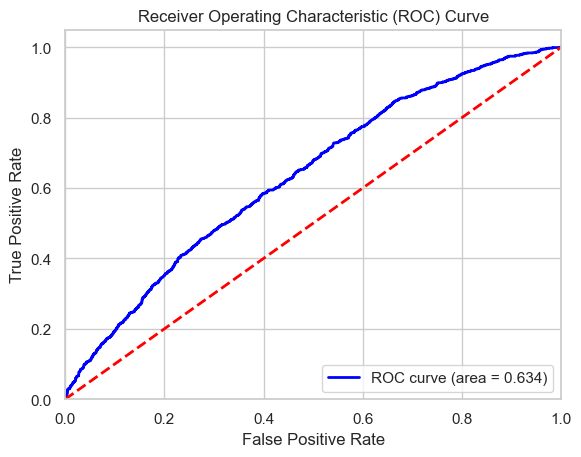

In [1141]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test2, y_pred_gbm2))

print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred_gbm2))

# Calculate precision, recall, fscore, and support
precision_gbm2, recall_gbm2, fscore_gbm2, support_gbm2 = precision_recall_fscore_support(y_test2, y_pred_gbm2, pos_label=1, average='binary')
auc_gbm2 = roc_auc_score(y_test2, y_pred_proba_gbm2)
accuracy_gbm2 = accuracy_score(y_test2, y_pred_gbm2)
fpr_gbm2, tpr_gbm2, thresholds_gbm2 = roc_curve(y_test2, y_pred_proba_gbm2, pos_label=1)

# Print metrics
print(f'Precision: {round(precision_gbm2, 3)}')
print(f'Recall: {round(recall_gbm2, 3)}')
print(f'F-score: {round(fscore_gbm2, 3)}')
print(f'Support: {support_gbm2}')
print(f'AUC: {round(auc_gbm2, 3)}')
print(f'Accuracy: {round(accuracy_gbm2, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm2, tpr_gbm2, color='blue', lw=2, label=f'ROC curve (area = {round(auc_gbm2, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## 3. Comparision between PCAs

In [1144]:

data = {
    "PCA Components": [2, 6, 9, 2, 6, 9],
    "Classifier": ["Random Forest", "Random Forest", "Random Forest", "GBM", "GBM", "GBM"],
    "Precision": [0.497, 0.533, 0.534, 0.549, 0.576, 0.556],
    "Recall": [0.306, 0.312, 0.315, 0.245, 0.241, 0.25],
    "F-score": [0.378, 0.393, 0.396, 0.339, 0.34, 0.345],
    "AUC": [0.598, 0.621, 0.609, 0.634, 0.634, 0.635],
    "Accuracy": [0.605, 0.622, 0.622, 0.624, 0.631, 0.626]
}

comparison_df = pd.DataFrame(data)

print(comparison_df)


   PCA Components     Classifier  Precision  Recall  F-score    AUC  Accuracy
0               2  Random Forest      0.497   0.306    0.378  0.598     0.605
1               6  Random Forest      0.533   0.312    0.393  0.621     0.622
2               9  Random Forest      0.534   0.315    0.396  0.609     0.622
3               2            GBM      0.549   0.245    0.339  0.634     0.624
4               6            GBM      0.576   0.241    0.340  0.634     0.631
5               9            GBM      0.556   0.250    0.345  0.635     0.626



1. PCA = 2 (2 Components):

- Pros:

 -- Minimal dimensionality reduction, resulting in potentially faster training times.

 -- Easier to interpret the two main principal components.

- Cons:

 -- Potentially significant information loss, as less than 40% of the variability is captured.

 -- Reduced ability to capture complex relationships within the data.


2. PCA = 6 (6 Components):

- Pros:

 -- Good balance between dimensionality reduction and information retention, capturing around 80% of the variability.
 
 -- Potential for improved model performance, as shown with the GBM classifier.

- Cons:

 -- More complex to interpret compared to using 2 components.
 
 -- Might still be too many components for efficient training with some classifiers.


3. PCA = 9 (9 Components):

- Pros:

 -- Retains almost all the variability from the original data.
 
 -- No information loss due to dimensionality reduction.

- Cons:

 -- No actual dimensionality reduction, potentially leading to longer training times and increased computational complexity.

 -- Potentially more prone to overfitting, especially if the model is already complex.



#### Key findings

- No Major Performance Differences: Based on the provided results, there's not a significant difference in performance between using 6, 9, or 2 components. All three approaches achieve relatively similar AUC and accuracy scores.

- Slight Edge for 6 Components with GBM: The best overall performance is seen when using 6 components with the GBM classifier (row 3). While the differences are not huge, GBM with 6 components achieves slightly higher precision and recall compared to the other configurations.

- Random Forest Consistency: The Random Forest classifier performs consistently across all three component numbers, suggesting that the choice of components doesn't greatly impact its performance in this case.

- Impact of Dimensionality Reduction: The fact that using fewer components (2 or 6) doesn't significantly impact performance suggests that the dimensionality reduction achieved through PCA might not be as crucial for this particular dataset.

#### Conclusion

- If i want significant dimensionality reduction and faster model training, I'll choose 2 components PCA =2. 

- If I seek a balance between information retention, performance, and interpretability, I'll choose 6 components PCA =6.


- If I prioritize retaining almost all the variability and don't have computational constraints, I'll choose 9 components PCA =9. 



In this study, I decided to choose PCA =6 with the GBM classifier.

## 4. Cross-Validation for model for PCA =6 with the GBM classifier

In [1149]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

Cross-validation scores: [0.621  0.5995 0.62   0.6265 0.6245]
Mean CV accuracy: 0.6183
Standard deviation of CV accuracy: 0.009688137075826277
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.90      0.73      1819
           1       0.51      0.17      0.25      1181

    accuracy                           0.61      3000
   macro avg       0.56      0.53      0.49      3000
weighted avg       0.58      0.61      0.54      3000

Confusion Matrix:
[[1629  190]
 [ 986  195]]
Precision: 0.506
Recall: 0.165
F-score: 0.249
Support: None
AUC: 0.601
Accuracy: 0.608


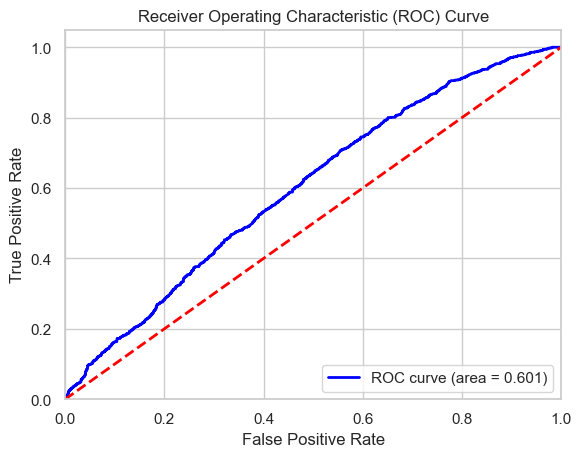

In [1150]:
# Define the number of PCA components
n_components = 6

# Create a pipeline with PCA and GBM classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('gbm', GradientBoostingClassifier())
])

# Define features (X) and target (y)
X_sampled = df_sampled.drop(['readmitted'], axis=1)
y_sampled = df_sampled['readmitted']

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_sampled, y_sampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean()}')
print(f'Standard deviation of CV accuracy: {cv_scores.std()}')

# Split into training and testing sets for further evaluation
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, shuffle=True, stratify=y_sampled, random_state=42)

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Predict
y_pred_gbm = pipeline.predict(X_test)
y_pred_proba_gbm = pipeline.predict_proba(X_test)[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))

# Calculate precision, recall, fscore, and support
precision_gbm, recall_gbm, fscore_gbm, support_gbm = precision_recall_fscore_support(y_test, y_pred_gbm, pos_label=1, average='binary')
auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_proba_gbm, pos_label=1)

# Print metrics
print(f'Precision: {round(precision_gbm, 3)}')
print(f'Recall: {round(recall_gbm, 3)}')
print(f'F-score: {round(fscore_gbm, 3)}')
print(f'Support: {support_gbm}')
print(f'AUC: {round(auc_gbm, 3)}')
print(f'Accuracy: {round(accuracy_gbm, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'ROC curve (area = {round(auc_gbm, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# II. Machine Learning with H2O AutoML Classification

In [4]:
df_sampled = df_diabetes_cleaned2.sample(n=10000, random_state=42)

X_sampled = df_sampled.drop(['readmitted'], axis=1)
y_sampled = df_sampled['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, shuffle=True, stratify=y_sampled, random_state=42)

In [5]:
# pip install h2o

In [6]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 mins 45 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_1ty5m0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.067 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
# Convert the training and testing sets to H2OFrame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Identify the target and feature names
target = 'readmitted'
features = X_sampled.columns.tolist()

# Ensure the target is treated as a factor (for classification)
train[target] = train[target].asfactor()
test[target] = test[target].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Train H2O AutoML

In [8]:
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=features, y=target, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/12
# GBM base models (used / total),4/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [9]:
# View the leaderboard to see the performance of all models
lb = aml.leaderboard
print(lb)


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_2_AutoML_2_20240526_75343     0.645347   0.63784   0.536856                0.402954  0.472764  0.223506
StackedEnsemble_BestOfFamily_3_AutoML_2_20240526_75343  0.645276   0.637989  0.536507                0.409013  0.472812  0.223551
StackedEnsemble_BestOfFamily_4_AutoML_2_20240526_75343  0.644863   0.638095  0.537079                0.415725  0.47284   0.223578
StackedEnsemble_AllModels_1_AutoML_2_20240526_75343     0.64477    0.637972  0.536484                0.423626  0.472803  0.223543
StackedEnsemble_BestOfFamily_2_AutoML_2_20240526_75343  0.643827   0.638389  0.535692                0.431955  0.47301   0.223738
StackedEnsemble_BestOfFamily_1_AutoML_2_20240526_75343  0.642554   0.638897  0.535093                0.425626  0.473231  0.223948
GBM_1_AutoML_2_20240526_75343                           0.641468   0.639377  0.531649     

#### Get the number of selected features

In [32]:
best_model = h2o.get_model("StackedEnsemble_AllModels_2_AutoML_2_20240526_75343")

In [33]:
# Function to count features
def count_features(model):
    features = model.varimp(use_pandas=True)['variable']
    return len(features)

if "StackedEnsemble" in best_model.model_id:
    print("The best model is a Stacked Ensemble. Counting features for each base model.")
    base_models = best_model.base_models
    for base_model_id in base_models:
        base_model = h2o.get_model(base_model_id)
        num_features = count_features(base_model)
        print(f"Base model {base_model_id} uses {num_features} features.")
else:
    num_features = count_features(best_model)
    print(f"The best model uses {num_features} features.")

The best model is a Stacked Ensemble. Counting features for each base model.
Base model GBM_1_AutoML_2_20240526_75343 uses 26 features.
Base model GBM_2_AutoML_2_20240526_75343 uses 26 features.
Base model GBM_5_AutoML_2_20240526_75343 uses 26 features.
Base model GBM_3_AutoML_2_20240526_75343 uses 26 features.
Base model XGBoost_3_AutoML_2_20240526_75343 uses 26 features.
Base model GBM_4_AutoML_2_20240526_75343 uses 26 features.
Base model DRF_1_AutoML_2_20240526_75343 uses 26 features.
Base model XGBoost_1_AutoML_2_20240526_75343 uses 25 features.
Base model XRT_1_AutoML_2_20240526_75343 uses 26 features.
Base model GLM_1_AutoML_2_20240526_75343 uses 26 features.
Base model XGBoost_2_AutoML_2_20240526_75343 uses 26 features.
Base model DeepLearning_1_AutoML_2_20240526_75343 uses 26 features.


In [34]:
#### Get the number of selected features of model GBM_1_AutoML_2_20240526_75343

chosen_gbm_model = h2o.get_model("GBM_1_AutoML_2_20240526_75343")

feature_importance = chosen_gbm_model.varimp(use_pandas=True)

selected_features = feature_importance[feature_importance['relative_importance'] != 0]

# Get the number of selected features
num_selected_features = selected_features.shape[0]

print("Number of selected features:", num_selected_features)


Number of selected features: 24


In [35]:
selected_features['variable']

0             number_inpatient
1           num_lab_procedures
2     discharge_disposition_id
3                     age_mean
4             time_in_hospital
5             number_diagnoses
6              num_medications
7          admission_source_id
8               num_procedures
9            number_outpatient
10           admission_type_id
11         diag_1_ICD9_encoded
12                      gender
13                     insulin
14                   A1Cresult
15                 diabetesMed
16                      change
17                   metformin
18               rosiglitazone
19            number_emergency
20                        race
21                   glyburide
22                   glipizide
23                pioglitazone
Name: variable, dtype: object

From the leaderboard and the number of selected features above:

- The top five models on the leaderboard are all Stacked Ensembles. This indicates that combining multiple base models (GBM, XGBoost) using a stacking approach generally leads to better predictive performance in this case.

- The StackedEnsemble_AllModels_2_AutoML_2_20240526_75343 model has the best AUC, but it's more complex than other models like GBM_1 or XGBoost_grid_1, so in reality, I might go with GBM or XGBoost model.

The chosen model is: GBM_1_AutoML_2_20240526_75343 with AUC = 0.0.641468 with 24 features.

## Test and evaluate model GBM_1_AutoML_2_20240526_75343

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1819
           1       0.54      0.28      0.36      1181

    accuracy                           0.62      3000
   macro avg       0.59      0.56      0.55      3000
weighted avg       0.60      0.62      0.59      3000

Confusion Matrix:
[[1538  281]
 [ 856  325]]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

Precision: 0.536
Recall: 0.275
F-score: 0.364
Support: 3000
AUC: 0.636


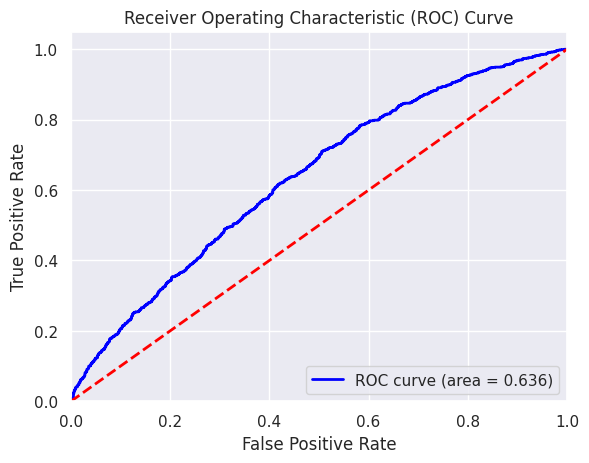

In [36]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


chosen_gbm_model = h2o.get_model("GBM_1_AutoML_2_20240526_75343")

predictions = chosen_gbm_model.predict(test)

predictions_df = predictions.as_data_frame()

actual_labels = test[target].as_data_frame()

predicted_probabilities = predictions_df['p1']

binary_predictions = (predicted_probabilities > 0.5).astype(int)

print("Classification Report:")
print(classification_report(actual_labels, binary_predictions))

print("Confusion Matrix:")
print(confusion_matrix(actual_labels, binary_predictions))

# Calculate precision, recall, f-score, and support
precision = precision_score(actual_labels, binary_predictions)
recall = recall_score(actual_labels, binary_predictions)
fscore = f1_score(actual_labels, binary_predictions)
support = len(actual_labels)

print(f'Precision: {round(precision, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'F-score: {round(fscore, 3)}')
print(f'Support: {support}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(actual_labels, predicted_probabilities)

# Calculate AUC
auc = roc_auc_score(actual_labels, predicted_probabilities)
print(f'AUC: {round(auc, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {round(auc, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Conclusion

- Model before feature selection: 26 features

- Model after feature selection: 24 features
    
Precision: 0.536
Recall: 0.275
F-score: 0.364
Support: 3000
AUC: 0.636

Computational time: 1 minute for 10,000 entries

But when I tried to run 50,000 entries, it took only 3 minutes on  I9 GPU GTX 4090.

# III. Machine Learning with Random Forest and ShapRFECV

## Building Machine Learning Classifiers: Random Forest on a holdout test set

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
df_sampled = df_diabetes_cleaned2.sample(n=10000, random_state=42)

# Splitting the sampled data
X_sampled = df_sampled.drop(['readmitted'], axis=1)
y_sampled = df_sampled['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, shuffle=True, stratify=y_sampled, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model =rf.fit(X_train, y_train)

In [18]:
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse =True)[0:10]

[(0.13136683636059707, 'num_lab_procedures'),
 (0.11579805208914877, 'num_medications'),
 (0.08153026429859224, 'time_in_hospital'),
 (0.06817297128031315, 'age_mean'),
 (0.06433607818187193, 'diag_1_ICD9_encoded'),
 (0.05898320829340748, 'number_diagnoses'),
 (0.055361009809807335, 'discharge_disposition_id'),
 (0.05442310680262083, 'num_procedures'),
 (0.03882993715603597, 'admission_type_id'),
 (0.03760143927859984, 'insulin')]

Precision: 0.528
Recall: 0.307
F-score: 0.388
Support: None
AUC: 0.618
Accuracy: 0.619


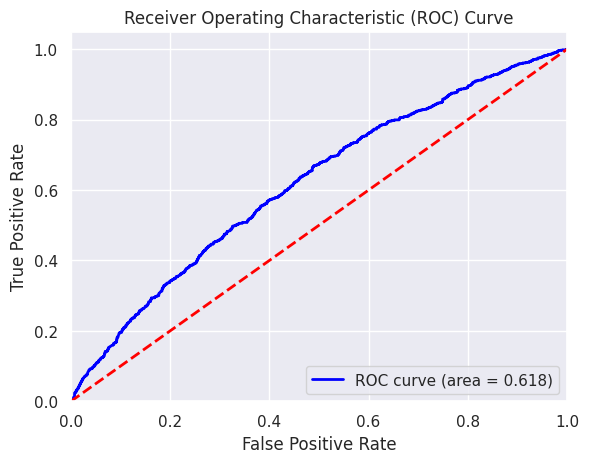

In [19]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, pos_label= 1, average='binary')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label= 1)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print metrics
print(f'Precision: {round(precision, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'F-score: {round(fscore, 3)}')
print(f'Support: {support}')
print(f'AUC: {round(auc, 3)}')
print(f'Accuracy: {round(accuracy, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {round(auc, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Implement SHAP-RFECV

In [20]:
# !pip install probatus
import shap
from probatus.feature_elimination import ShapRFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [21]:
# Compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Use the mean absolute value of the SHAP values for feature importance
shap_importance = np.abs(shap_values[1]).mean(axis=0)  # assuming binary classification, select the class 1


In [22]:
# Function to rank features by SHAP importance
def rank_features_by_shap(shap_importance, features):
    return sorted(zip(shap_importance, features), reverse=True)

# Rank features
ranked_features = rank_features_by_shap(shap_importance, X_train.columns)
print("Ranked features by SHAP importance:")
for importance, feature in ranked_features:
    print(f"{feature}: {importance}")

Ranked features by SHAP importance:
race: 0.015699571562216054
gender: 0.015699571562215985


In [23]:
# Define a custom scorer using the AUC
from sklearn.metrics import make_scorer
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)


In [24]:
# Implement SHAP-RFECV
class ShapRFECV(RFECV):
    def __init__(self, estimator, step=1, min_features_to_select=1, cv=5, scoring=None, verbose=0):
        super().__init__(estimator, step=step, min_features_to_select=min_features_to_select, cv=cv, scoring=scoring, verbose=verbose)
        self.shap_importance = None

    def _get_feature_importances(self):
        # Fit the model and get SHAP values
        self.estimator_.fit(self.grid_scores_[0][1], self.grid_scores_[0][2])
        explainer = shap.TreeExplainer(self.estimator_)
        shap_values = explainer.shap_values(self.grid_scores_[0][1])
        self.shap_importance = np.abs(shap_values[1]).mean(axis=0)
        return self.shap_importance

In [25]:
# Apply ShapRFECV
shap_rfecv = ShapRFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring=auc_scorer)
shap_rfecv.fit(X_train, y_train)

ShapRFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
          estimator=RandomForestClassifier(max_depth=20, n_estimators=50,
                                           n_jobs=-1),
          scoring=make_scorer(roc_auc_score, needs_proba=True))

In [26]:
# Get the selected features
selected_features = X_train.columns[shap_rfecv.support_]
print("Selected features:", selected_features)

Selected features: Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_inpatient', 'number_diagnoses', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'insulin', 'change', 'age_mean',
       'diag_1_ICD9_encoded'],
      dtype='object')


20 features are selected.

## Train a new model with selected features


In [27]:
rf_selected = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

## Test and Evaluate the model

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      1819
           1       0.52      0.32      0.39      1181

    accuracy                           0.61      3000
   macro avg       0.58      0.56      0.56      3000
weighted avg       0.59      0.61      0.59      3000

Confusion Matrix:
[[1466  353]
 [ 804  377]]
Precision: 0.516
Recall: 0.319
F-score: 0.395
Support: None
AUC: 0.61
Accuracy: 0.614


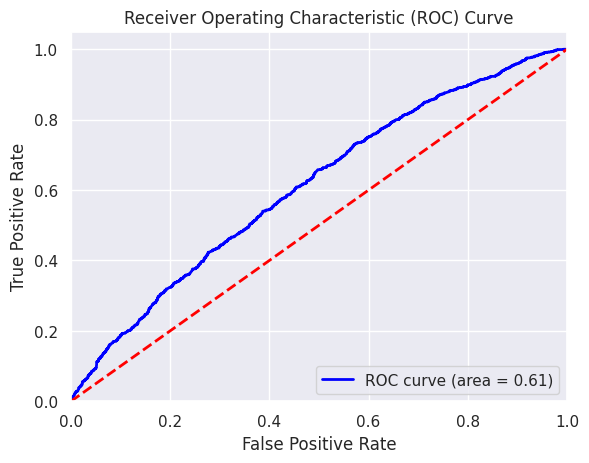

In [28]:
y_pred = rf_selected.predict(X_test[selected_features])
y_pred_proba = rf_selected.predict_proba(X_test[selected_features])[:, 1]

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

print(f'Precision: {round(precision, 3)}')
print(f'Recall: {round(recall, 3)}')
print(f'F-score: {round(fscore, 3)}')
print(f'Support: {support}')
print(f'AUC: {round(auc, 3)}')
print(f'Accuracy: {round(accuracy, 3)}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {round(auc, 3)})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Explore RandomForestClassifier through Cross-Validation

In [29]:
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs =-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_sampled, y_sampled, cv=k_fold, scoring ='accuracy', n_jobs =-1)

array([0.6165, 0.6105, 0.6145, 0.64  , 0.627 ])

In [30]:
import numpy as np

In [31]:
cv_scores = np.array([0.605, 0.636, 0.621, 0.632, 0.614])

# Calculate mean and standard deviation
mean_accuracy = np.mean(cv_scores)
print(f'Average Accuracy: {mean_accuracy:.3f}')

std_accuracy = np.std(cv_scores)
print(f'Standard Deviation of Accuracy: {std_accuracy:.3f}')


Average Accuracy: 0.622
Standard Deviation of Accuracy: 0.011


## Conclusion

In [6]:
# Data before and after feature selection
data = {
    "Metric": ["Precision", "Recall", "F-score", "Support", "AUC", "Accuracy", "Average Accuracy (CV)", "Std Deviation of Accuracy (CV)"],
    "Before Feature Selection (26 features)": [0.528, 0.307, 0.388, None, 0.618, 0.619, None, None],
    "After Feature Selection with SHAP-RFECV (20 features)": [0.516, 0.319, 0.395, None, 0.61, 0.614, 0.622, 0.011]
}

# Create a DataFrame
rf_shap = pd.DataFrame(data)

# Display the DataFrame
rf_shap

,Metric,Before Feature Selection (26 features),After Feature Selection with SHAP-RFECV (20 features)
0,Precision,0.528,0.516
1,Recall,0.307,0.319
2,F-score,0.388,0.395
3,Support,NaN,NaN
4,AUC,0.618,0.610
5,Accuracy,0.619,0.614
6,Average Accuracy (CV),NaN,0.622
7,Std Deviation of Accuracy (CV),NaN,0.011


#### Key findings

The model performance after feature selection using SHAP-RFECV shows a slight improvement in some metrics, but the overall changes are relatively minor.

The addition of cross-validation performance metrics (Average Accuracy and Std Deviation) after feature selection suggests that the model's performance is more consistent across different folds of the data. This implies that the model is less susceptible to overfitting.

Computational time: 10 minutes for 10,000 entries.

But when I tried to run 50,000 entries, it took more than 30 minutes on  I9 GPU GTX 4090.

# IV. Comparision between 3 approaches

In [11]:
import pandas as pd

# Create data for the table
data = {
    "Model": ["H2o: GBM_1_AutoML_2_20240526_75343", "RandomForestClassifier (ShapRFECV)", "PCA = 6 with GBM"],
    "Precision": [0.536, 0.516, 0.576],
    "Recall": [0.275, 0.319, 0.241],
    "F-score": [0.364, 0.395, 0.34],
    "Support": ["3000", "None", "None"],
    "AUC": [0.636, 0.61, 0.634],
    "Accuracy": ["0.62", 0.614, 0.631],
    "Avg CV Accuracy": ["N/A", 0.622, 0.6183],
    "CV Accuracy Std Dev": ["N/A", 0.01, 0.009688137075826277],
    "Computational Time": ["1 minute", "10 minutes", "30 seconds"],
    "Selected Features": [24, 20, 26]
}

# Create the DataFrame
result = pd.DataFrame(data)

# Set index to start from 1
result.index += 1

# Display the DataFrame
result


,Model,Precision,Recall,F-score,Support,AUC,Accuracy,Avg CV Accuracy,CV Accuracy Std Dev,Computational Time,Selected Features
1,H2o: GBM_1_AutoML_2_20240526_75343,0.536,0.275,0.364,3000,0.636,0.62,N/A,N/A,1 minute,24
2,RandomForestClassifier (ShapRFECV),0.516,0.319,0.395,None,0.610,0.614,0.622,0.01,10 minutes,20
3,PCA = 6 with GBM,0.576,0.241,0.340,None,0.634,0.631,0.6183,0.009688,30 seconds,26


## 2. Key findings

- H2o AutoML GBM (Model 1): Shows promising results with a decent AUC and accuracy, but lacks cross-validation data. The computational time is relatively short. This model likely benefits from automated hyperparameter tuning and feature selection within the H2O AutoML framework.


- ShapRFECV with Random Forest (Model 2): Demonstrates the benefits of feature selection with SHAP-RFECV. The model has a slightly better F-score than the H2O GBM model but a lower AUC. However, this model includes cross-validation metrics, highlighting its robustness and the consistency of its performance.


- PCA = 6 with GBM (Model 3): Provides a decent AUC and accuracy, comparable to the H2O GBM model. The cross-validation results are similar, suggesting good generalizability. This model's strength is in its relatively fast computation time.


## 2. Comparison and Consideration

1. Performance:

- H2O AutoML GBM (Model 1): Strong AUC and accuracy, but lacks cross-validation.

- ShapRFECV with Random Forest (Model 2): Slightly better F-score, good cross-validation results.

- PCA = 6 with GBM (Model 3): Similar AUC and accuracy, good cross-validation, fastest computation time.


Overall, the three models exhibit similar performance, with H2O GBM having a slight edge in AUC and accuracy, and Random Forest (with feature selection) having a slightly better F-score.


2. Computational Time:

- H2O AutoML GBM: 1 minute

- ShapRFECV with Random Forest: 10 minutes

- PCA = 6 with GBM: 30 seconds


Model 2 (ShapRFECV) highlights the potential benefits of feature selection, resulting in fewer features and better cross-validation performance. However, the difference in performance is not substantial.
Computational Time: Model 3 (PCA = 6 with GBM) has the fastest computation time, offering a practical advantage for quick prototyping and iterations.


3. Feature Selection:

- ShapRFECV: Selected 20 features

- H2O AutoML: Likely selected features internally

- PCA = 6: Used all 26 features

4. Cross-Validation: 

The cross-validation metrics (Avg CV Accuracy and CV Accuracy Std Dev) are crucial for evaluating a model's generalizability and robustness. Models 2 and 3 provide valuable insights into how the models might perform on unseen data.


5. Model Complexity: 

Consider the complexity of each model. The H2O AutoML model likely has more internal complexity, while the PCA model is more straightforward.

## 3. Pros and Cons

#### 4.1. PCA

#### Pros:

- Since PCA's main idea is dimensionality reduction, it helps to speed up the training and testing time of your machine learning algorithm, especially when the data has a lot of features and the learning process is slow.
- PCA considers the linear correlation between numerical variables, which is beneficial because, in healthcare datasets, many features overlap and support each other.
- PCA is stable; when I ran it multiple times, the results changed only slightly.
- It is computationally efficient, taking almost 30 seconds to run, thus saving computational resources.
- PCA performs well with multicollinearity, which can improve the performance of regression models by removing redundant features.
    
    
#### Cons:

- PCA doesn’t consider categorical variables; in our clean dataset, we have 18 categorical variables and only 9 numerical variables. This limitation can reduce the effectiveness of PCA in datasets with a significant number of categorical features.
- The correlation matrix in this dataset shows that the overall correlations are not strong enough to be a significant concern for multicollinearity. When I ran VIF to test for multicollinearity, there was no significant multicollinearity among them. Therefore, in this case, the PCA method may not work well. This indicates that PCA might not provide significant benefits in reducing dimensionality for this particular dataset.
- PCA doesn’t help reduce the number of features to a meaningful subset, so when we employ the models, we still need to collect all of the features. This can be a drawback if the goal is to simplify the model and reduce data collection costs.

#### 4.2. SHAP-RFECV

#### Pros:

- SHAP-RFECV considers both numerical and categorical variables, making it versatile for different types of datasets.
- It reduces the number of features, allowing us to identify significant and selected features. This can simplify the model and improve interpretability.
- When we employ the models, we only need to collect data for the selected features, reducing data collection costs and effort.

#### Cons:

- SHAP-RFECV doesn’t take correlation into account. This can be a drawback if correlated features are important for the model's performance.
- It is time-consuming, requiring more than 2 hours to run the whole dataset. This can be a limitation in scenarios where quick results are needed.
- It is not stable; every time I run it, it shows different results. This variability can make it challenging to reproduce and trust the results. It might require additional techniques, such as averaging results over multiple runs, to achieve more stable outcomes.


#### 4.3. H2O AutoML

#### Pros:

- User-friendly and accessible for those with limited ML experience. 
- Saves time by automating model selection and hyperparameter tuning. 
- Evaluates multiple algorithms and models. 
- Handles large datasets efficiently with less computing time. 
- Achieves competitive performance with minimal manual intervention.

#### Cons:
- May not offer the flexibility experienced data scientists need. 
- Requires understanding to use effectively and interpret outputs. 
- Risk of overfitting if not properly validated. 
- Complex models can be challenging to interpret. 

## 4. Decision

- If I have a very large dataset, the computational time might be more significant. In that case, the faster PCA model (Model 3) or a simplified Random Forest model (Model 2) might be preferred.

- If I have deep domain expertise and can easily interpret the features, the full model with 26 features (Model 3) could be sufficient.

- If I onsider experimenting with more complex models (e.g., XGBoost) or combining multiple models (ensembles) to potentially improve performance, I'll choose H2O AutoML to explore a wider range of models and automated feature selection.

- If I want want to understand the underlying relationships between features (both numerical and categoriacal) and the target variable. Model 2's feature selection process can make it easier to identify and focus on the most relevant features, simplifying analysis and potentially improving interpretability. 

In conclusion, I'll choose model 2 ( ShapRFECV with Random Forest) even though it has a longer computational time than PCA with GBM. However, in this datset,  overall correlations are not strong enough to be a significant concern for multicollinearity so PCA may not do its best. 

## 5. Areas of Improvement

If I could do again, I would:

- I would test the models on the original dataset with 100,000 entries. The results above are based on a sample dataset of 10,000 entries, which might not fully capture the variability and patterns present in the larger dataset. Testing on the full dataset would provide a more comprehensive evaluation of the models' performance and robustness.

- I would invest time in understanding the dataset, the nature of the diabetes data, and the behavior of diabetes patients. Better domain knowledge would enable more informed feature selection, interpretation of results, and identification of relevant variables. For instance, understanding how certain medical measurements relate to diabetes progression could help in refining the model and making more accurate predictions.

- To improve model performance, I would explore more feature engineering techniques, such as interaction terms and polynomial features, to capture non-linear relationships in the data.

- Finally, I would establish a process for monitoring the model's performance over time, ensuring it continues to perform well as new data becomes available. This could involve setting up a pipeline for regular model retraining and evaluation.